In [134]:
# Capstone Project- Mentor- Ritik Kumar

In [135]:
# Project Company - Idea Spice

Overview

Idea Spice is a boutique design and marketing firm with offices in the UAE and India.

Idea Spice offers breakthrough business solutions using design, strategy and innovative marketing.

Over the past 16 years we have successfully created over 1000 design solutions across a diverse range of industries. From governments to start ups, multi nationals to small and medium enterprises - our focus is to transform the client’s business.

In [136]:
#Dataset information


#The dataset has 4 .csv files. The columns/features in the given dataset are as follows:

#Employee Profile:

#Name: Name of the employee
#Employeid: Unique ID of an Employee
#Gender:  Gender of the employee
#Age: Age of an employe (in years)
#MaritalStatus: Marital Status of the Employee( Married/ Single/ Divorced etc)
#Education: Qualifications are in which field (Medical/marketing/technical etc)
#Qualifications: How many qualifications does an employee have
#Vertical: In which department employee is working
#Role: What is the employee role in the organization (Technician/Manager/HR etc)
#Work Experience: Total experience of the employee
#DistanceFromHome: Distance between office and employee home


#Employee Satisfaction:

#Employeid: Unique ID of an Employee
#Turnover: Retention rate of an employee
#Traveling: Whether traveling is required in job role of an employee
#Satisfaction: How much employee is satisfied in his/her role (1 minimum and 5 maximum)
#Engagement: How much engagement is required for the role (1 minimum and 5 maximum)
#Level: Level of the job( 1 being entry level and 5 means top management)
#Last Rating: Last financial year performance
#SalaryHike: Last salary increment in percentage
#Work&Life: balance between work and life (1 minimum and 5 maximum)
#Employee Behaviour:

#Employeid: Unique ID of an Employee
#YearsAtCompany: Years employee is working with the current organization
#YearsInCurrentRole: Years employee working at current designation
#YearsSinceLastPromotion: When was last promoted
#YearsWithCurrentManager: How long employee has been working with Current manager
#TrainingTimesLastYear: Training completed by an employee in last year
#Employee Salary:

#Employeid: Unique ID of an Employee
#Daily: Daily wages of the employees
#Hour:  Hours wages of the employees
#Monthly: Monthly wages of the employee
#MonthlyRate: Total salary paid to the employee
#OverTime: Whether an employee have done overtime or not
#Hours: Working hours of an Employee

In [137]:
#Task -Sanity check and data cleaning

#Task -Sanity check and data cleaning-
#Import the dataset
Concatenate the dataset on the basis of employeid
Using python Check for missing values, duplicate entries and irrelevant columns
Handle missing values by either removing rows/columns or filling them with appropriate values
Convert categorical variables to numerical variables using one-hot encoding or label encoding
Convert the target variable to 0s and 1s
Remove outliers and extreme values, if any
Perform basic feature engineering by creating new variables or combining existing variables, if necessary. Examples could include creating age groups, income brackets, or a ratio of income to credit limit.
Check for any correlations between variables, and handle any multicollinearity issues
Check the distribution of the variables and transform them if needed to normalize the data

In [138]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

#Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

#Library for building machine learning models
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [139]:
#We do have 4 csv file with common column name "EmployeID". So we have to merge all 4 files in single file

In [140]:
# reading multiple dataset with help on pandas , we have 4 csv files so dataframe names as (df1,df2,df3,df4)
df1 = pd.read_csv('/content/Employee Profile.csv')

In [141]:
#checking first 5 records of first csv file
df1.head()

,Name,EmployeId,Gender,Age,MaritalStatus,EducationField,Qualifications,Vertical,Role,Work Experience,DistanceFromHome
0,Aaliyah,IDSL227,F,40,Single,Medical,3,Sales,Sales Executive,1,2
1,Aaron,IDSL030,M,46,Married,Marketing,4,Sales,Sales Executive,9,23
2,Abby,IDRD581,F,49,Single,Medical,3,Research & Development,Research Director,5,13
3,Abel,IDRD633,M,29,Married,Life Sciences,5,Research & Development,Healthcare Representative,1,13
4,Abigail,IDRD122,F,54,Married,Medical,3,Research & Development,Research Director,2,1


In [142]:
#Basic information of numeric data example (Mean, std, min, max and quartiles)
df1.describe()

,Age,Qualifications,Work Experience,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,37.065306,2.876190,2.659184,9.278231
std,9.522562,1.019038,2.501769,8.157120
min,18.000000,1.000000,0.000000,1.000000
25%,30.000000,2.000000,1.000000,2.000000
50%,36.000000,3.000000,1.000000,7.000000
75%,44.000000,4.000000,4.000000,15.000000
max,59.000000,5.000000,9.000000,29.000000


In [143]:
#reading 2nd csv file
df2 = pd.read_csv('/content/Employee Salary.csv')

In [144]:
#checking first 5 sample records
df2.sample(5)

,EmployeId,Daily,Hour,Monthly,MonthlyRate,OverTime,Hours
1377,IDHR033,618,70,2726,25235,Yes,80
280,IDSL115,188,93,10825,22414,No,80
1102,IDRD541,1113,41,19827,6171,Yes,80
390,IDSL209,992,98,6540,14063,No,80
1382,IDSL157,922,87,17475,2125,Yes,80


In [145]:
# reading 3rd csv file
df3 = pd.read_csv('/content/Employee Behaviour.csv')

In [146]:
#checking first 5 sample records
df3.sample(3)

,EmployeId,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear
1373,IDSL400,13,2,0,2,3
196,IDRD730,10,7,9,8,2
592,IDSL238,1,0,0,0,3


In [147]:
# reading 4th csv file

df4 = pd.read_csv('/content/Employee Satisfaction.csv')

In [148]:
#checking first 5 records
df4.head()

,EmployeId,Turnover,Travelling,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
0,IDSL227,No,Sometimes,4,2,2,4,23,3
1,IDSL030,No,No,4,3,2,3,18,3
2,IDRD581,No,Sometimes,4,3,4,3,14,4
3,IDRD633,No,Sometimes,4,3,3,3,19,2
4,IDRD122,No,Sometimes,1,1,4,3,13,3


In [149]:
# all 4 dataset  had common column name "EmployeeId". So merge the csv with common column
merged_df1 = pd.merge(df1, df2, on='EmployeId')

In [150]:
#checking 5 records after mergeing the 2 files
merged_df1.head()

,Name,EmployeId,Gender,Age,MaritalStatus,EducationField,Qualifications,Vertical,Role,Work Experience,DistanceFromHome,Daily,Hour,Monthly,MonthlyRate,OverTime,Hours
0,Aaliyah,IDSL227,F,40,Single,Medical,3,Sales,Sales Executive,1,2,129,97,6287,4984,Yes,80
1,Aaron,IDSL030,M,46,Married,Marketing,4,Sales,Sales Executive,9,23,134,64,4866,24079,No,80
2,Abby,IDRD581,F,49,Single,Medical,3,Research & Development,Research Director,5,13,934,82,19833,25706,Yes,80
3,Abel,IDRD633,M,29,Married,Life Sciences,5,Research & Development,Healthcare Representative,1,13,1201,32,7854,3642,No,80
4,Abigail,IDRD122,F,54,Married,Medical,3,Research & Development,Research Director,2,1,1478,42,18731,13254,No,80


In [151]:
# all 4 dataset  had common column name "EmployeeId". So merge the csv with common column

merged_df2 = pd.merge(df3, df4, on='EmployeId')

In [152]:
#merge  only accept 2 parameter so took 3 step to final merge file

df = pd.merge(merged_df1, merged_df2, on='EmployeId')

In [153]:
#checking 5 records after mergeing the all files

df.head()

,Name,EmployeId,Gender,Age,MaritalStatus,EducationField,Qualifications,Vertical,Role,Work Experience,...,YearsWithCurrentManager,TrainingTimesLastYear,Turnover,Travelling,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
0,Aaliyah,IDSL227,F,40,Single,Medical,3,Sales,Sales Executive,1,...,1,1,No,Sometimes,4,2,2,4,23,3
1,Aaron,IDSL030,M,46,Married,Marketing,4,Sales,Sales Executive,9,...,7,2,No,No,4,3,2,3,18,3
2,Abby,IDRD581,F,49,Single,Medical,3,Research & Development,Research Director,5,...,7,2,No,Sometimes,4,3,4,3,14,4
3,Abel,IDRD633,M,29,Married,Life Sciences,5,Research & Development,Healthcare Representative,1,...,8,3,No,Sometimes,4,3,3,3,19,2
4,Abigail,IDRD122,F,54,Married,Medical,3,Research & Development,Research Director,2,...,1,3,No,Sometimes,1,1,4,3,13,3


In [154]:
#Merged file information
df.shape

(1470, 30)

In [155]:
#Computing Total No. of Missing Values and the Percentage of Missing Values.
missing_df = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
Name,0,0.0
EmployeId,0,0.0
Gender,0,0.0
Age,0,0.0
MaritalStatus,0,0.0
EducationField,0,0.0
Qualifications,0,0.0
Vertical,0,0.0
Role,0,0.0
Work Experience,0,0.0


In [156]:
#Dataset Shape information and type information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     1470 non-null   object
 1   EmployeId                1470 non-null   object
 2   Gender                   1470 non-null   object
 3   Age                      1470 non-null   int64 
 4   MaritalStatus            1470 non-null   object
 5   EducationField           1470 non-null   object
 6   Qualifications           1470 non-null   int64 
 7   Vertical                 1470 non-null   object
 8   Role                     1470 non-null   object
 9   Work Experience          1470 non-null   int64 
 10  DistanceFromHome         1470 non-null   int64 
 11  Daily                    1470 non-null   int64 
 12  Hour                     1470 non-null   int64 
 13  Monthly                  1470 non-null   int64 
 14  MonthlyRate              1470 non-null  

In [157]:
# saved merged file in csv in one common name
df.to_csv('merged_employees.csv', index=False)

In [158]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1470
Number of columns: 30


In [159]:
#duplicate lines
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

there is no duplicate values in the file

In [160]:
#descriptive statistics of each column
df.describe()

,Age,Qualifications,Work Experience,DistanceFromHome,Daily,Hour,Monthly,MonthlyRate,Hours,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,37.065306,2.876190,2.659184,9.278231,763.046939,65.074830,6752.281633,14539.982313,80.0,6.772109,4.066667,2.095238,3.945578,2.769388,2.702041,2.712245,2.087075,3.162585,15.122449,2.798639
std,9.522562,1.019038,2.501769,8.157120,426.331994,20.604377,5141.197951,7172.390592,0.0,5.777745,3.741427,3.261537,3.702486,1.350900,1.095039,0.731141,1.109663,0.369112,3.817658,0.714718
min,18.000000,1.000000,0.000000,1.000000,107.000000,30.000000,1102.000000,2125.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000
25%,30.000000,2.000000,1.000000,2.000000,403.750000,47.000000,2919.250000,8688.750000,80.0,3.000000,2.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,12.000000,2.000000
50%,36.000000,3.000000,1.000000,7.000000,704.500000,66.000000,4854.000000,14717.500000,80.0,5.000000,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,14.000000,3.000000
75%,44.000000,4.000000,4.000000,15.000000,1151.000000,83.000000,8838.500000,20455.500000,80.0,9.000000,7.000000,2.000000,7.000000,3.000000,4.000000,3.000000,3.000000,3.000000,18.000000,3.000000
max,59.000000,5.000000,9.000000,29.000000,1495.000000,100.000000,19847.000000,26933.000000,80.0,33.000000,17.000000,15.000000,17.000000,6.000000,4.000000,4.000000,5.000000,4.000000,25.000000,4.000000


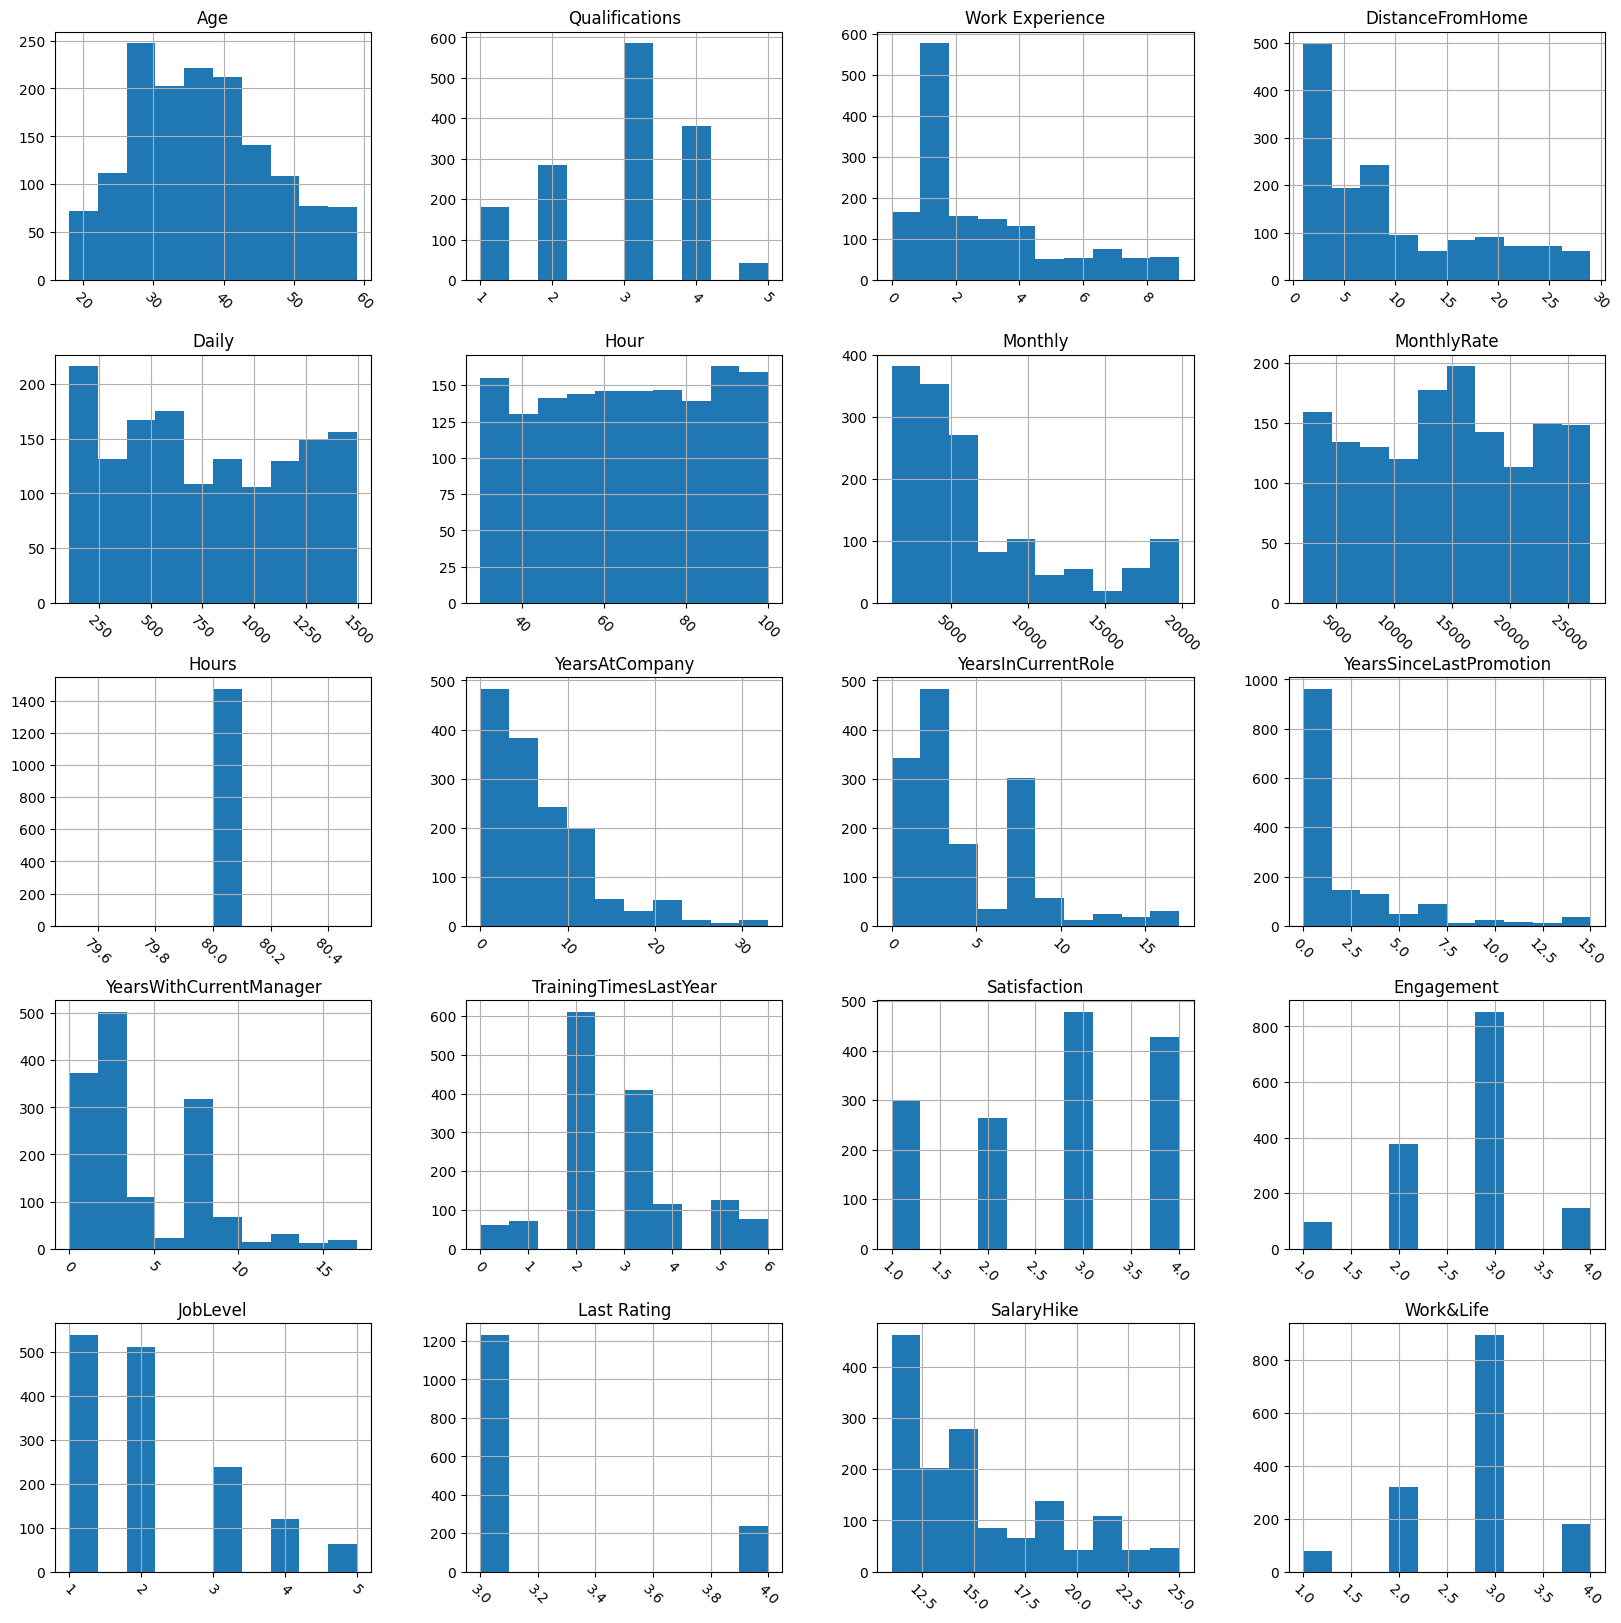

In [161]:
#histogram for numerical columns
df.hist(figsize=(20,20), xrot=-45)
plt.show()

In [162]:
#Data type of each column
df.dtypes

Name                       object
EmployeId                  object
Gender                     object
Age                         int64
MaritalStatus              object
EducationField             object
Qualifications              int64
Vertical                   object
Role                       object
Work Experience             int64
DistanceFromHome            int64
Daily                       int64
Hour                        int64
Monthly                     int64
MonthlyRate                 int64
OverTime                   object
Hours                       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrentManager     int64
TrainingTimesLastYear       int64
Turnover                   object
Travelling                 object
Satisfaction                int64
Engagement                  int64
JobLevel                    int64
Last Rating                 int64
SalaryHike                  int64
Work&Life     

In [163]:
# We use select_dtypes method to list columns of type numerical and category
cat_coulmns  = df.select_dtypes(['object']).columns
num_coulmns  = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Name', 'EmployeId', 'Gender', 'MaritalStatus', 'EducationField',
       'Vertical', 'Role', 'OverTime', 'Turnover', 'Travelling'],
      dtype='object')
Index(['Age', 'Qualifications', 'Work Experience', 'DistanceFromHome', 'Daily',
       'Hour', 'Monthly', 'MonthlyRate', 'Hours', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'TrainingTimesLastYear', 'Satisfaction',
       'Engagement', 'JobLevel', 'Last Rating', 'SalaryHike', 'Work&Life'],
      dtype='object')


In [164]:
# Consider the value set of categorical attributes
num_cols = list(set(df._get_numeric_data()))
cat_cols = list(set(df.columns) - set(df._get_numeric_data()))
for col in cat_cols:
    print('Unique values of ', col, set(df[col]))

Unique values of  Gender {'M', 'F'}
Unique values of  OverTime {'Yes', 'No'}
Unique values of  EmployeId {'IDRD755', 'IDRD055', 'IDRD169', 'IDSL331', 'IDRD696', 'IDSL258', 'IDRD160', 'IDSL063', 'IDRD839', 'IDRD817', 'IDRD340', 'IDRD724', 'IDSL058', 'IDSL002', 'IDSL299', 'IDRD275', 'IDSL434', 'IDRD314', 'IDRD083', 'IDRD752', 'IDRD623', 'IDSL174', 'IDSL164', 'IDRD436', 'IDSL062', 'IDRD598', 'IDRD540', 'IDRD738', 'IDRD333', 'IDSL374', 'IDSL185', 'IDRD378', 'IDRD655', 'IDHR037', 'IDSL345', 'IDSL311', 'IDSL336', 'IDRD530', 'IDRD611', 'IDRD284', 'IDHR045', 'IDRD178', 'IDRD875', 'IDRD869', 'IDSL054', 'IDSL317', 'IDSL248', 'IDRD344', 'IDSL096', 'IDSL139', 'IDRD819', 'IDRD702', 'IDSL324', 'IDSL136', 'IDRD840', 'IDRD214', 'IDSL288', 'IDSL282', 'IDSL424', 'IDSL162', 'IDRD506', 'IDRD101', 'IDSL009', 'IDRD437', 'IDRD633', 'IDRD271', 'IDRD590', 'IDRD747', 'IDSL079', 'IDRD843', 'IDRD195', 'IDRD612', 'IDRD502', 'IDSL269', 'IDRD250', 'IDRD117', 'IDSL297', 'IDSL189', 'IDRD810', 'IDSL395', 'IDHR044', 'ID

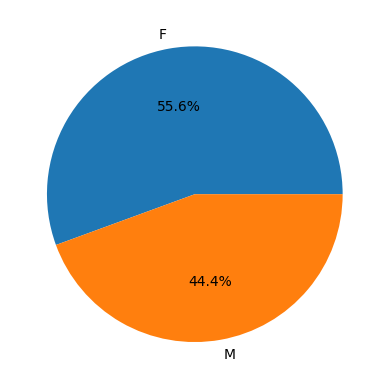

In [165]:
#Ratio of men and women in the organization.
plot_df = df.copy()
plot_df= plot_df['Gender'].value_counts()

plt.pie(plot_df, labels=plot_df.index, autopct='%1.1f%%')
plt.show()

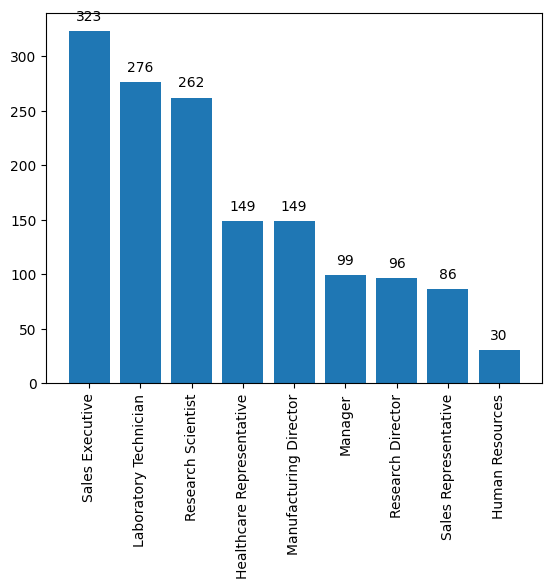

In [166]:
#Ratio of Role in work
plot_df = df.copy()
plot_df = plot_df['Role'].value_counts()

plt.bar(plot_df.index, plot_df.values) # rotation of bar names in grph
plt.xticks(rotation=90)
for i, v in enumerate(plot_df.values):
    plt.text(i, v+10, str(v), ha='center')

plt.show()

In [167]:
# correlations value between each independent variable and the depen
df.corr()

<ipython-input-167-76f2fc01d700>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,Qualifications,Work Experience,DistanceFromHome,Daily,Hour,Monthly,MonthlyRate,Hours,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
Age,1.000000,0.168775,0.263648,-0.000681,-0.015840,0.033740,0.450740,-0.034034,NaN,0.274847,0.166661,0.243112,0.211945,0.008368,0.000039,0.055303,0.477536,-0.000699,-0.016923,0.027239
Qualifications,0.168775,1.000000,0.069417,0.027077,-0.005173,0.003911,0.082919,-0.002374,NaN,0.081110,0.101081,0.077899,0.083012,0.025234,-0.021491,0.065444,0.103452,-0.064084,-0.045970,-0.026776
Work Experience,0.263648,0.069417,1.000000,-0.019835,0.006540,-0.014679,0.170346,0.014936,NaN,-0.046538,-0.074516,-0.000191,-0.047348,-0.031731,-0.007772,0.037899,0.178912,-0.004825,-0.013589,0.013370
DistanceFromHome,-0.000681,0.027077,-0.019835,1.000000,-0.057532,-0.032421,0.024039,0.010122,NaN,0.014822,0.002046,0.059849,0.018624,-0.039455,-0.016548,0.018798,0.030187,0.016844,0.010054,0.024562
Daily,-0.015840,-0.005173,0.006540,-0.057532,1.000000,-0.036091,-0.010337,-0.036442,NaN,-0.003492,0.016156,0.010464,-0.052963,0.024635,0.005733,-0.029437,-0.032321,0.005692,0.003223,-0.017998
Hour,0.033740,0.003911,-0.014679,-0.032421,-0.036091,1.000000,0.065810,-0.020962,NaN,-0.012597,-0.015359,-0.017225,-0.015714,0.020186,-0.027462,0.059044,0.060333,0.008245,-0.010778,-0.007528
Monthly,0.450740,0.082919,0.170346,0.024039,-0.010337,0.065810,1.000000,0.035305,NaN,0.403145,0.259666,0.308181,0.307545,-0.009758,-0.004413,0.009715,0.842783,0.021545,-0.026839,0.019715
MonthlyRate,-0.034034,-0.002374,0.014936,0.010122,-0.036442,-0.020962,0.035305,1.000000,NaN,0.059068,0.061384,-0.046310,0.059022,-0.012401,-0.030750,-0.001306,0.038847,-0.043608,-0.046465,0.004003
Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearsAtCompany,0.274847,0.081110,-0.046538,0.014822,-0.003492,-0.012597,0.403145,0.059068,NaN,1.000000,0.603121,0.535934,0.631212,-0.050259,0.003570,0.003803,0.460718,-0.002086,-0.027868,-0.011615


<ipython-input-168-c5b1ba40fce9>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



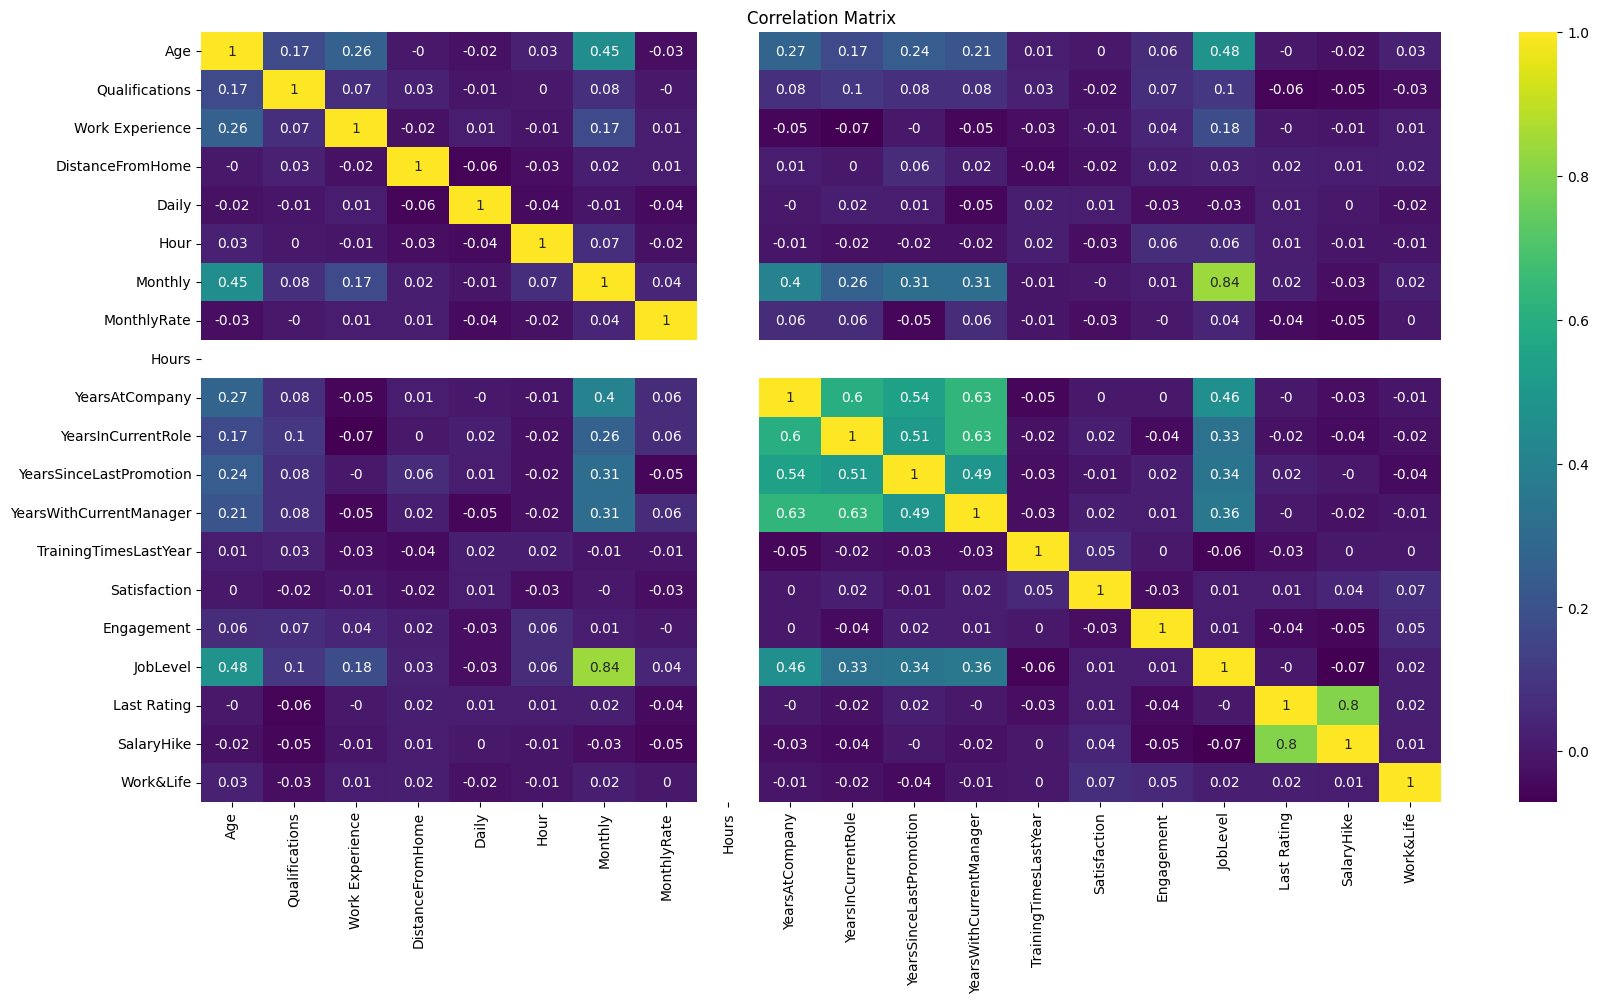

In [168]:
#checking Correclation in vaiables
corr = round(df.corr(), 2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

## Task 2

In [169]:
df.columns

Index(['Name', 'EmployeId', 'Gender', 'Age', 'MaritalStatus', 'EducationField',
       'Qualifications', 'Vertical', 'Role', 'Work Experience',
       'DistanceFromHome', 'Daily', 'Hour', 'Monthly', 'MonthlyRate',
       'OverTime', 'Hours', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager',
       'TrainingTimesLastYear', 'Turnover', 'Travelling', 'Satisfaction',
       'Engagement', 'JobLevel', 'Last Rating', 'SalaryHike', 'Work&Life'],
      dtype='object')

In [170]:
df.sample(5)

,Name,EmployeId,Gender,Age,MaritalStatus,EducationField,Qualifications,Vertical,Role,Work Experience,...,YearsWithCurrentManager,TrainingTimesLastYear,Turnover,Travelling,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
616,Horace,IDSL305,M,33,Married,Life Sciences,4,Sales,Sales Executive,3,...,2,2,Yes,Sometimes,2,3,2,3,15,1
156,Bianca,IDRD503,F,45,Single,Life Sciences,1,Research & Development,Manufacturing Director,1,...,13,6,No,Sometimes,3,2,3,4,21,3
1262,Samuel,IDRD051,M,33,Divorced,Medical,4,Research & Development,Manufacturing Director,9,...,7,5,No,Sometimes,3,1,3,4,24,2
388,Diane,IDRD081,F,39,Married,Life Sciences,2,Research & Development,Healthcare Representative,1,...,7,3,No,Sometimes,1,3,2,4,25,3
594,Harvey,IDHR024,M,41,Divorced,Marketing,4,Human Resources,Research Scientist,3,...,1,2,Yes,Sometimes,3,3,1,3,18,3


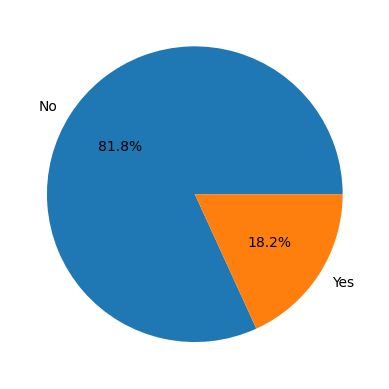

In [171]:
# Attriction in company
plot_df = df.copy()
plot_df= plot_df['Turnover'].value_counts()

plt.pie(plot_df, labels=plot_df.index, autopct='%1.1f%%')
plt.show()

There is 18.2% Attriction in the company

Task 2 Porblem statement

Visualize the data using appropriate graphs and charts, such as bar charts, histograms, scatter plots, or box plots, to gain insights into the data.
###Bar Chart: Visualize the distribution of categorical variables such as Gender, Department, Marital Status, Qualifications, Education Field, Role, and Over Time to understand the employee composition in different categories.
### Histogram: Plot a histogram to analyze the distribution of numerical variables like Age, Daily wages, Monthly wages, Work Experience, Years At Company, Years In Current Role, Years Since Last Promotion, Years With Current Manager, and Distance From Home. This will provide an understanding of the data's central tendencies and spread.
###Scatter Plot: Create scatter plots to examine the relationship between variables. For example, plot Age against Employee Satisfaction or Years At Company against Retention to explore potential correlations.
####Box Plot: Use box plots to visualize the distribution of numerical variables across different categories. For instance, create box plots of Satisfaction by Department or Engagement by Level to identify any variations or outliers.
###Heatmap: Generate a heatmap to visualize the correlation between variables such as Employee Satisfaction, Engagement, Satisfaction, and Retention. This will help identify the strength and direction of relationships among these variables.
###Calculate summary statistics, such as mean, median, mode, range, standard deviation, and correlation coefficients, to provide a quantitative description of the data.
###Identify any outliers, missing values, or inconsistencies in the data and take appropriate actions, such as removing or imputing missing values or transforming variables.
###Perform hypothesis testing, for example, you could Investigate if employee satisfaction levels are related to attrition.
###Use statistical inference methods, such as confidence intervals and p-values, to draw conclusions about the data and test hypotheses.
###Create a report summarizing your findings and insights from the data analysis on what all factors lead more to employees leaving and staying at a company and provide recommendations for how the company could improve employee retention based on the data.

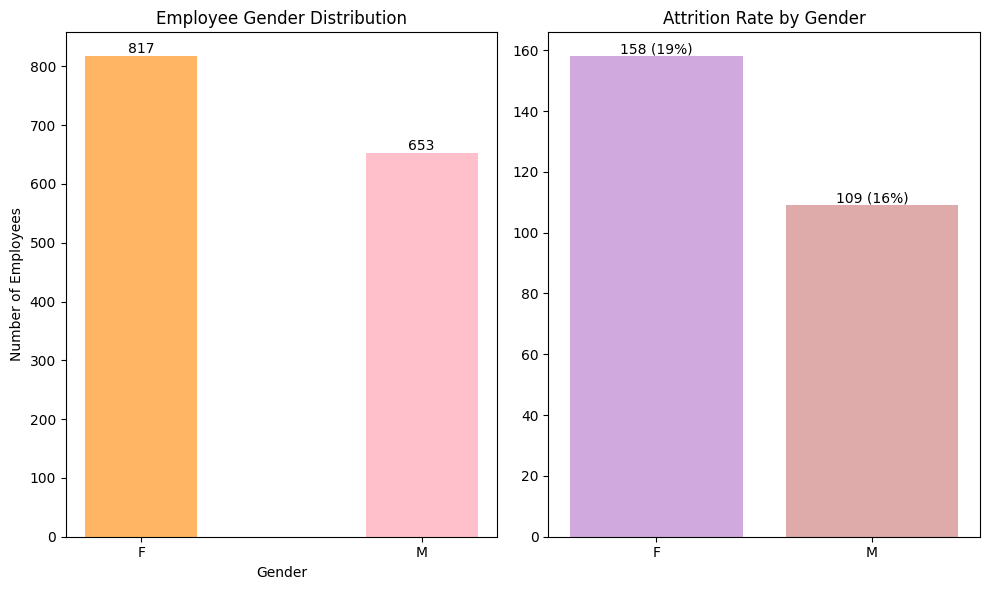

In [172]:
#Visualization to show Total Employees by Gender.
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
gender_counts = df["Gender"].value_counts()
plt.bar(gender_counts.index, gender_counts, width=0.4, color=["#ffb563", "#FFC0CB"])
plt.title("Employee Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)

# Adding count labels on top of the bars
for index, value in enumerate(gender_counts):
    plt.text(index, value, str(value), ha="center", va="bottom")

# Plotting Employee Attrition Rate by Gender
plt.subplot(1, 2, 2)
attrition_df = df[df["Turnover"] == "Yes"]
value_all = df["Gender"].value_counts()
value_attrition = attrition_df["Gender"].value_counts()
attrition_rate = np.floor((value_attrition / value_all) * 100).values
sns.barplot(x=value_attrition.index, y=value_attrition.values, palette=["#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by Gender")
for index, value in enumerate(value_attrition):
    plt.text(index, value, f"{value} ({int(attrition_rate[index])}%)", ha="center", va="bottom")
plt.tight_layout()

plt.show()

Per Graph Female ratio is high as compare to male employee and Attrition also high which is 19%

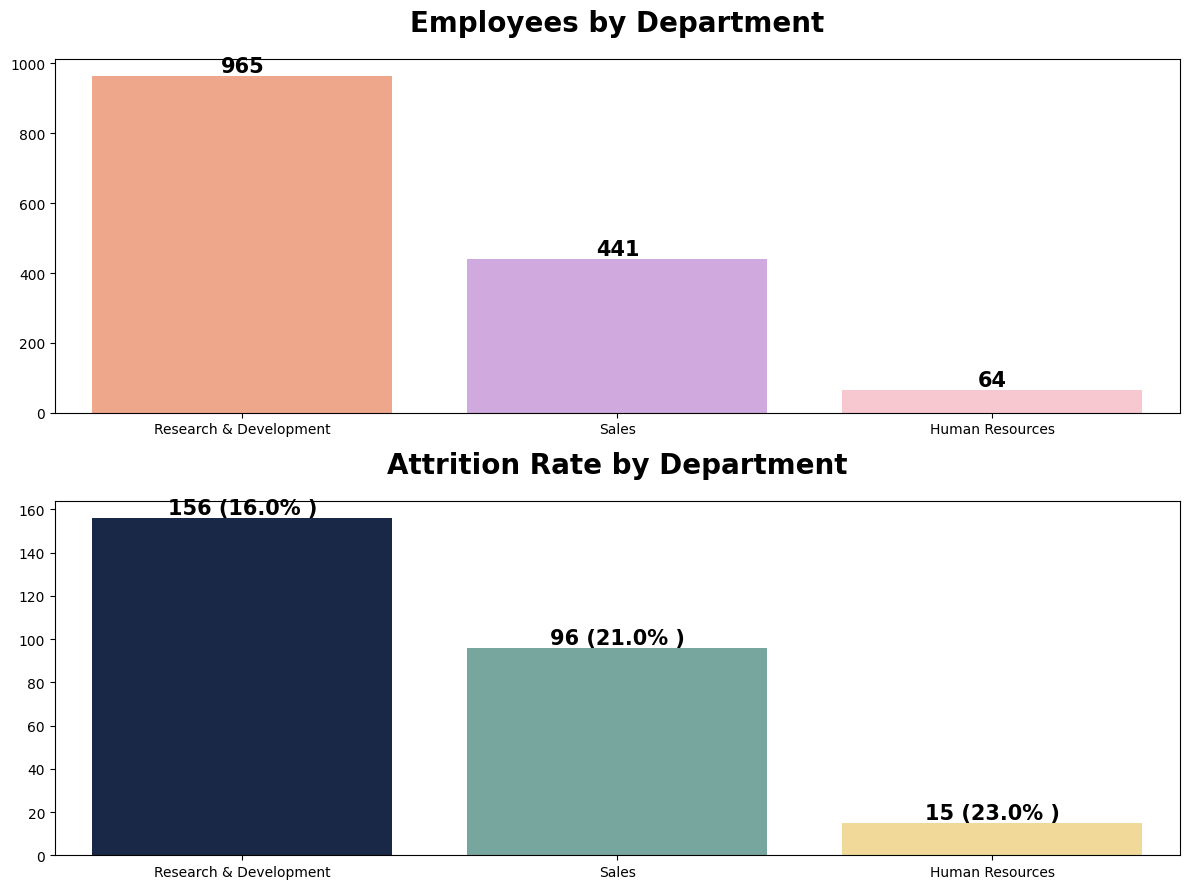

In [173]:
#Visualization to show Total Employees by Department.
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
value_1 = df["Vertical"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB"])
plt.title("Employees by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15,)

#Visualization to show Employee Attrition Rate by Department.
plt.subplot(2,1,2)
new_df = df[df["Turnover"]=="Yes"]
value_2 = new_df["Vertical"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

We have compare employee ratio and Research & development has high employee ratio as compare to other Roles,
Human Resources has least employee ratio

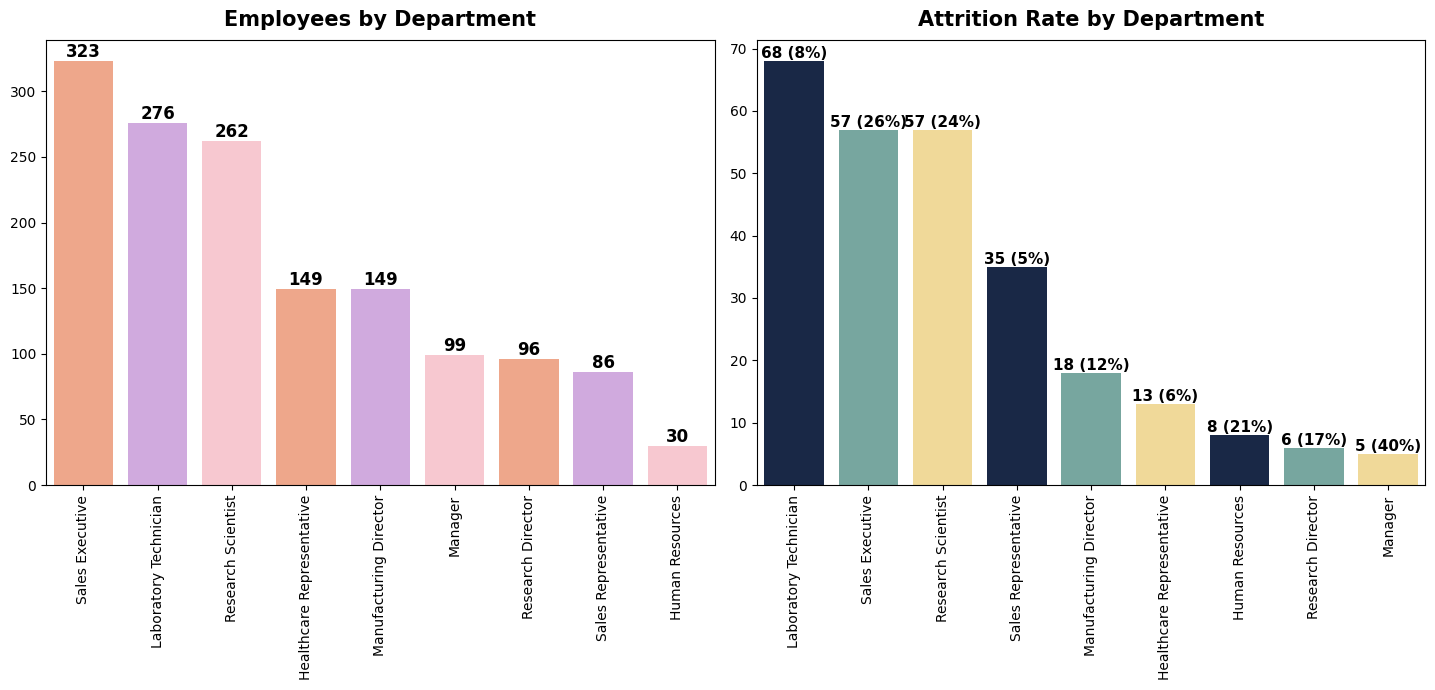

In [182]:
#Visualization to show Total Employees by Department.

plt.figure(figsize=(14.5, 7))  # Adjust the figure size for the desired height

# Plotting Employees by Department
plt.subplot(1, 2, 1)  # Make the subplot thinner
value_1 = df["Role"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, palette=["#FFA07A", "#D4A1E7", "#FFC0CB"])
plt.title("Employees by Department", fontweight="black", size=15, pad=10)
for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=12)  # Smaller font size

# Rotating Department Labels Vertically
plt.xticks(rotation='vertical')

# Visualization to show Employee Attrition Rate by Department.
plt.subplot(1, 2, 2)  # Make the subplot thinner
value_2 = new_df["Role"].value_counts()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, palette=["#11264e", "#6faea4", "#FEE08B"])
plt.title("Attrition Rate by Department", fontweight="black", size=15, pad=10)
for index, value in enumerate(value_2):
    plt.text(index, value, f"{value} ({int(attrition_rate[index])}%)", ha="center", va="bottom",
             size=11, fontweight="black")  # Smaller font size

# Rotating Department Labels Vertically
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


Company has Sales Excutive role in high and least is HR


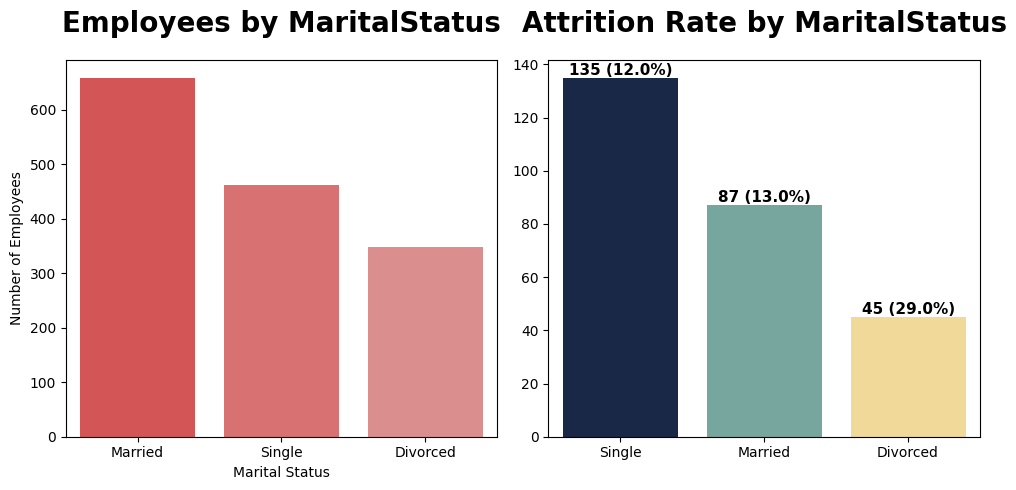

In [183]:
#Visualization to show Total Employees by MaritalStatus.

plt.figure(figsize=(10, 5))

# Plotting Employees by MaritalStatus
plt.subplot(1, 2, 1)
value_1 = df["MaritalStatus"].value_counts()
plt.title("Employees by MaritalStatus", fontweight="black", size=20, pad=20)
sns.barplot(x=value_1.index, y=value_1.values, palette=['#E84040', '#E96060', '#E88181', '#E7A1A1'],
            data=df)
plt.xlabel("Marital Status")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)

# Visualization to show Attrition Rate by MaritalStatus
plt.subplot(1, 2, 2)
value_2 = new_df["MaritalStatus"].value_counts()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"],
            data=new_df)
plt.title("Attrition Rate by MaritalStatus", fontweight="black", size=20, pad=20)
for index, value in enumerate(value_2):
    plt.text(index, value, f"{value} ({attrition_rate[index]}%)", ha="center", va="bottom",
             size=11, fontweight="black")
plt.tight_layout()
plt.show()


Company has high empoyee ratio of Married people and high attrition in single people

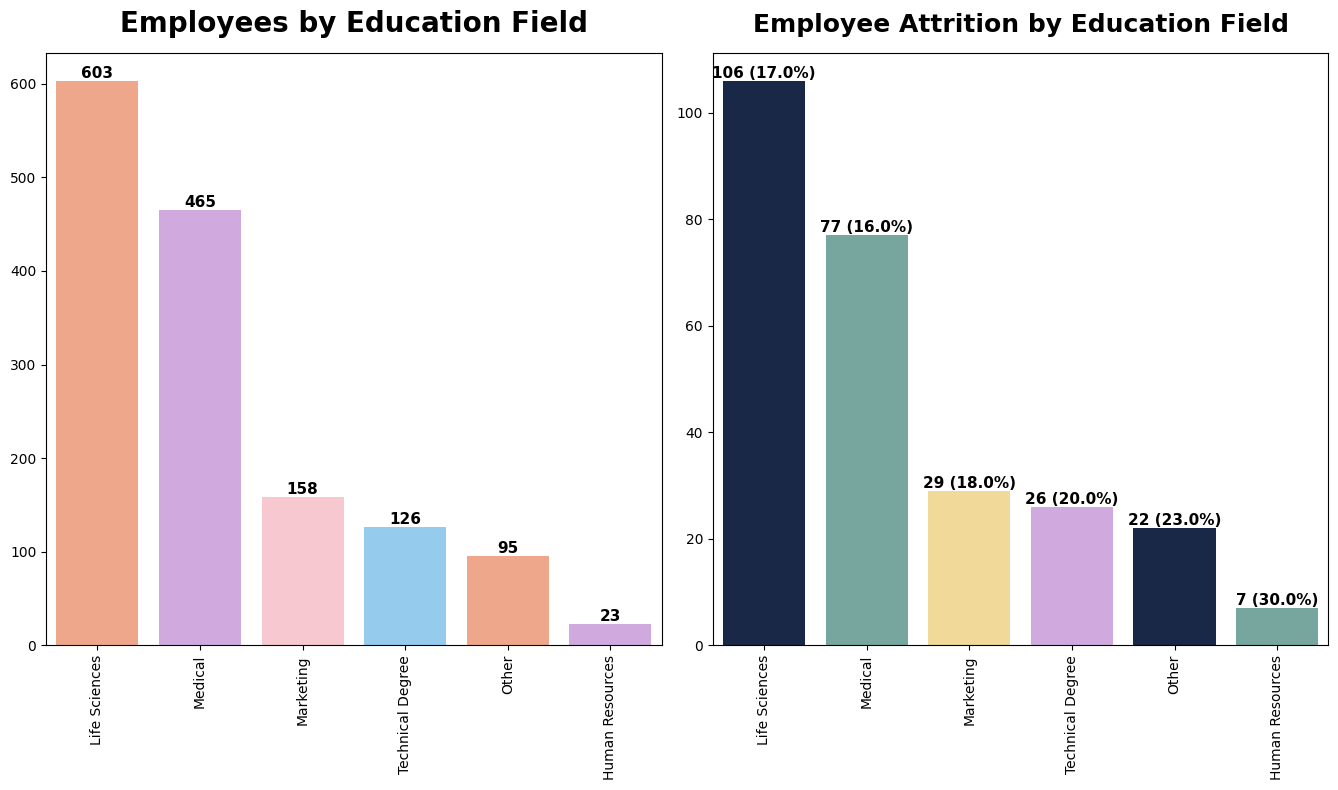

In [185]:
#Visualization to show Total Employees by Education Field.
plt.figure(figsize=(13.5,8))
plt.subplot(1,2,1)
value_1 = df["EducationField"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Education Field",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=11)
plt.xticks(rotation=90)

#Visualization to show Employee Attrition by Education Field.
plt.subplot(1,2,2)
value_2 = new_df["EducationField"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Employee Attrition by Education Field",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=11)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Most Employee came from Life Science education and Attrition also from same field

## Histogram
Plot a histogram to analyze the distribution of numerical variables like Age, Daily wages, Monthly wages, Work Experience, Years At Company, Years In Current Role, Years Since Last Promotion, Years With Current Manager, and Distance From Home. This will provide an understanding of the data's central tendencies and spread.

Text(0.5, 1.0, 'Employee Attrition by Daily Income')

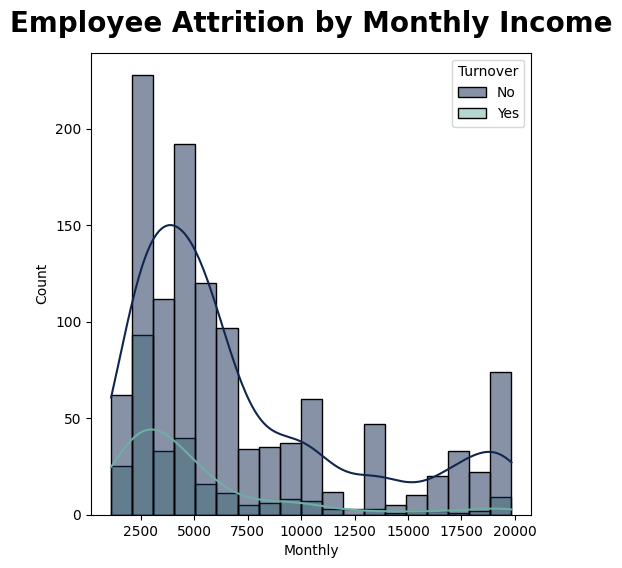

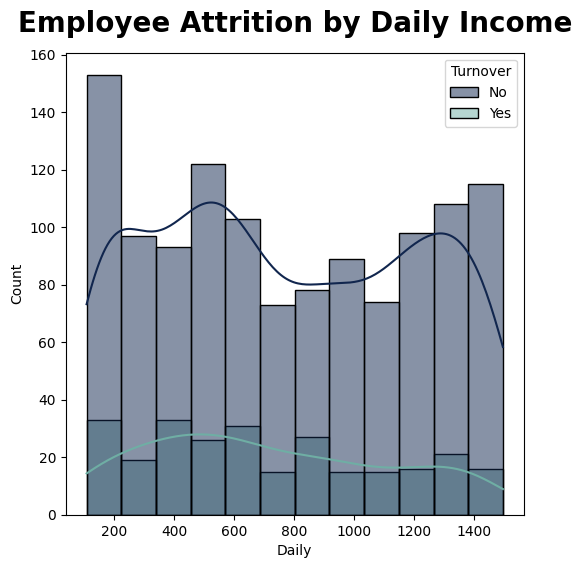

In [187]:
#Visualization to show Employee Distribution by Monthly Income.
plt.figure(figsize=(12.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Monthly", hue="Turnover", kde=True ,data=df,palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)

#Visualization to show Employee Distribution by Daily Income.
plt.figure(figsize=(13,6))
plt.subplot(1,2,2)
sns.histplot(x="Daily", hue="Turnover", kde=True ,data=df,palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Daily Income",fontweight="black",size=20,pad=15)

Text(0.5, 1.0, 'Employee Distribution by Work Experience')

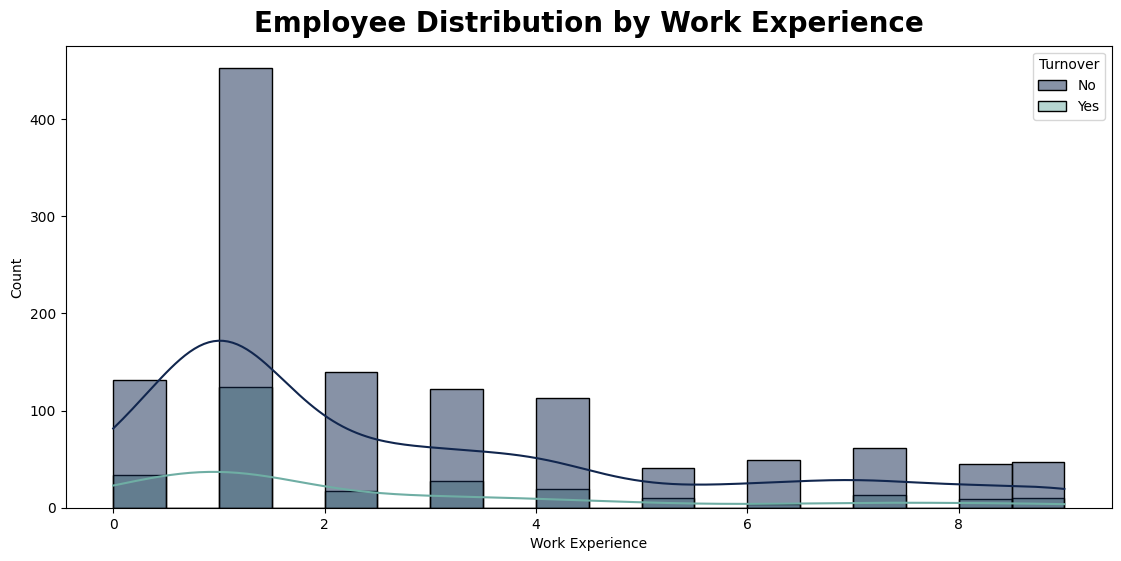

In [188]:
#Visualization to show Employee Distribution by Work Experience.
plt.figure(figsize=(13.5,6))

sns.histplot(x="Work Experience",hue="Turnover",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Work Experience",fontweight="black",size=20,pad=10)


Text(0.5, 1.0, 'Employee Distribution by Years At Company')

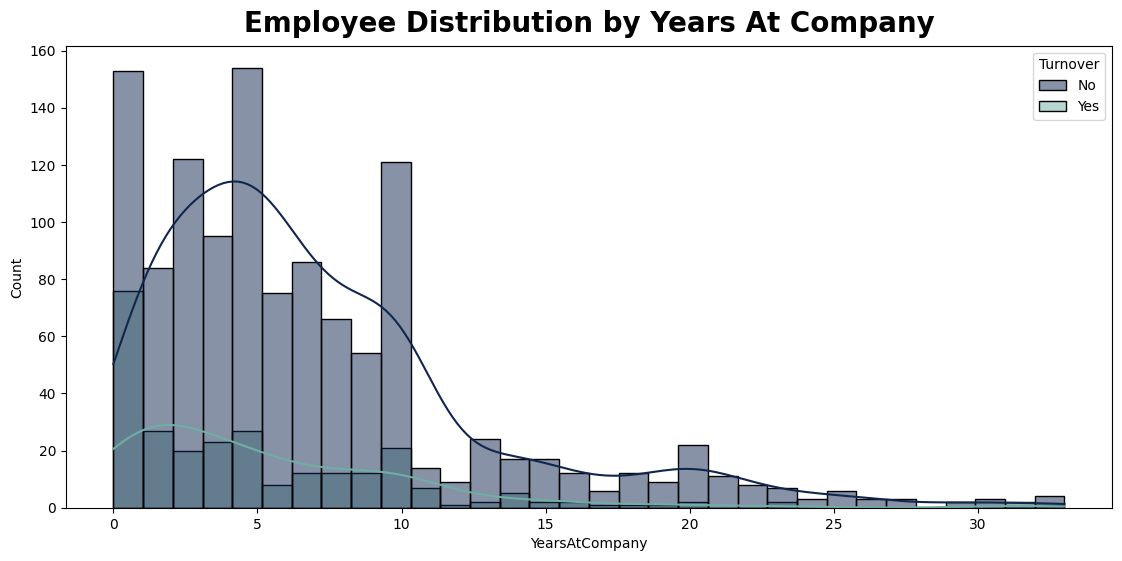

In [192]:
#Visualization to show Employee Distribution by Years At Company.
plt.figure(figsize=(13.5,6))

sns.histplot(x="YearsAtCompany",hue="Turnover",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Years At Company",fontweight="black",size=20,pad=10)

Text(0.5, 1.0, 'Employee Distribution by Years In Current Role')

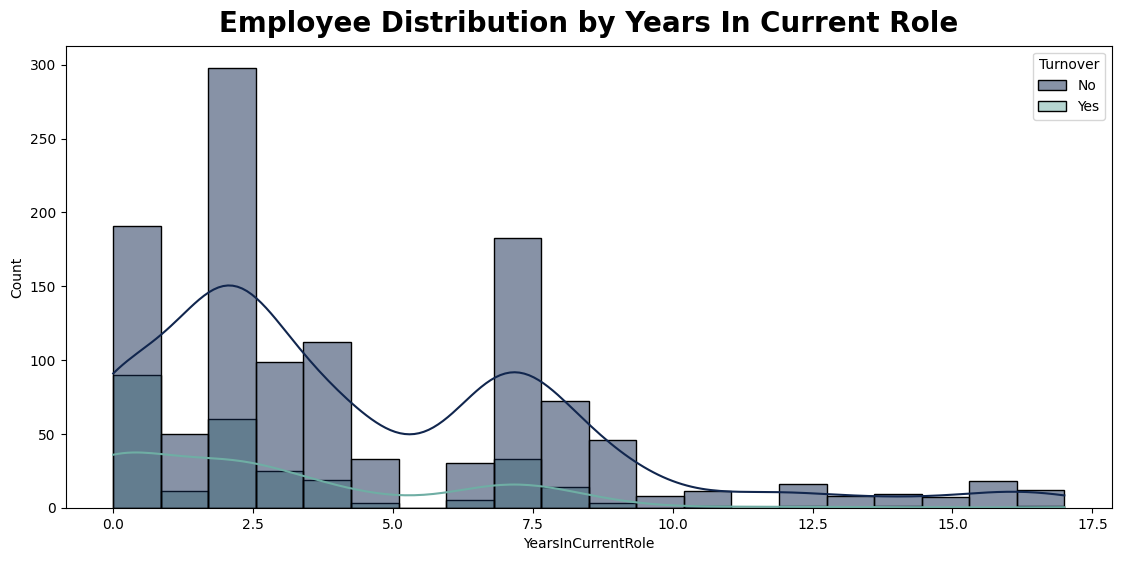

In [190]:
#Visualization to show Employee Distribution by Years In Current Role.
plt.figure(figsize=(13.5,6))

sns.histplot(x="YearsInCurrentRole",hue="Turnover",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Years In Current Role",fontweight="black",size=20,pad=10)

Text(0.5, 1.0, 'Employee Distribution by Years Since Last Promotion')

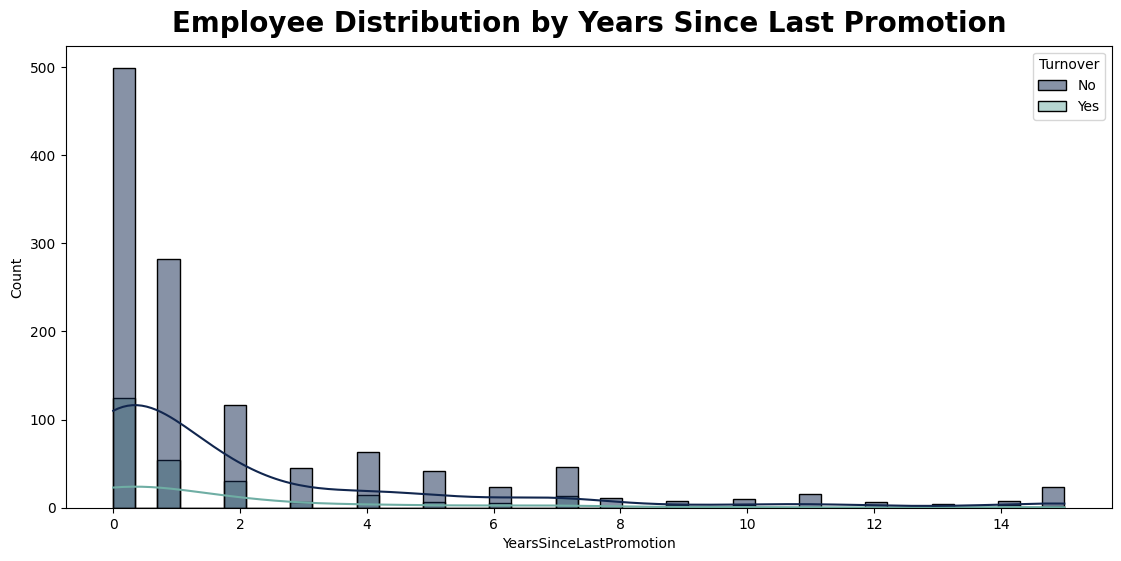

In [193]:
#Visualization to show Employee Distribution by Years Since Last Promotion.
plt.figure(figsize=(13.5,6))

sns.histplot(x="YearsSinceLastPromotion",hue="Turnover",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Years Since Last Promotion",fontweight="black",size=20,pad=10)

Text(0.5, 1.0, 'Employee Distribution by Years With Current Manager')

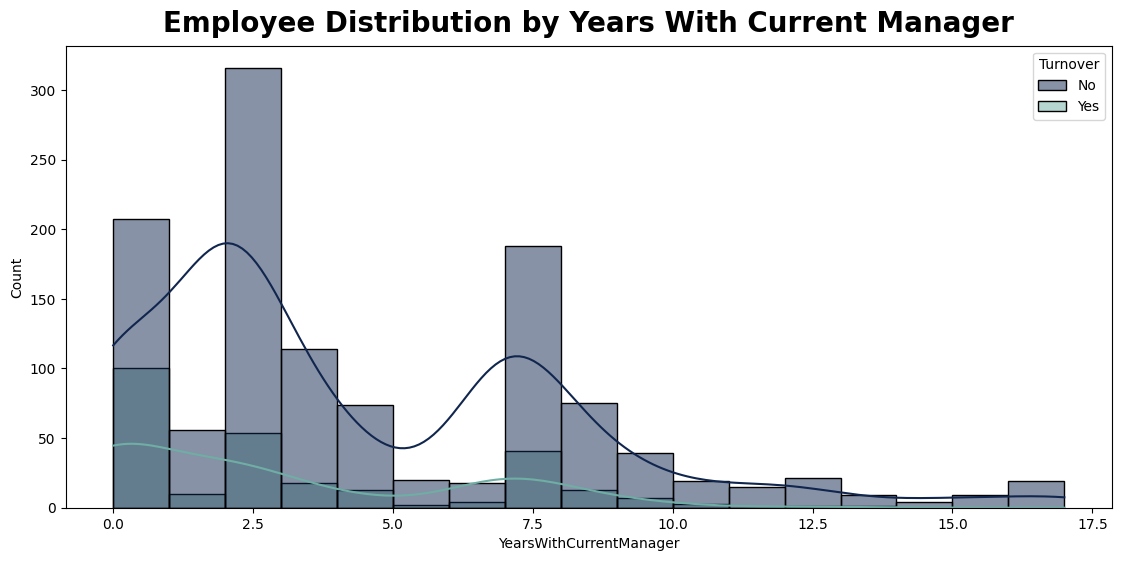

In [195]:
#Visualization to show Employee Distribution by Years With Current Manager.
plt.figure(figsize=(13.5,6))

sns.histplot(x="YearsWithCurrentManager",hue="Turnover",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Years With Current Manager",fontweight="black",size=20,pad=10)

Text(0.5, 1.0, 'Employee Distribution by Distance From Home')

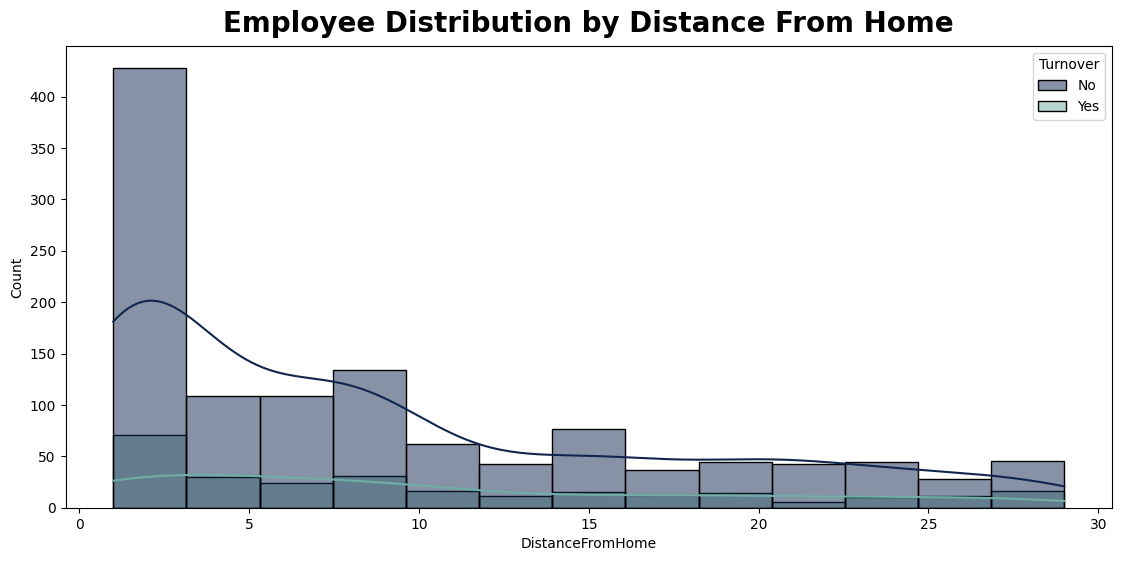

In [196]:
#Visualization to show Employee Distribution by Distance From Home.
plt.figure(figsize=(13.5,6))

sns.histplot(x="DistanceFromHome",hue="Turnover",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Distance From Home",fontweight="black",size=20,pad=10)

Most employee came within 5 km distance from company

## Scatter Plot: Create scatter plots to  examine the relationship between variables. For example, plot Age against Employee Satisfaction or Years At  Company against Retention to explore potential correlations.

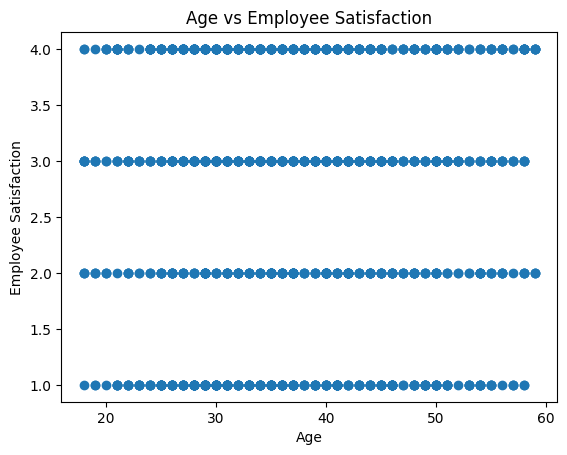

In [197]:
#Visualization to show plot Age against Employee Satisfaction or Years At Company against Retention to explore potential correlations.
plt.scatter(df['Age'], df['Satisfaction'])
plt.xlabel('Age')
plt.ylabel('Employee Satisfaction')
plt.title('Age vs Employee Satisfaction')
plt.show()


There is no correlation in Age and Employee Satisfaction. Thats why is it showing straight line in x and y axis

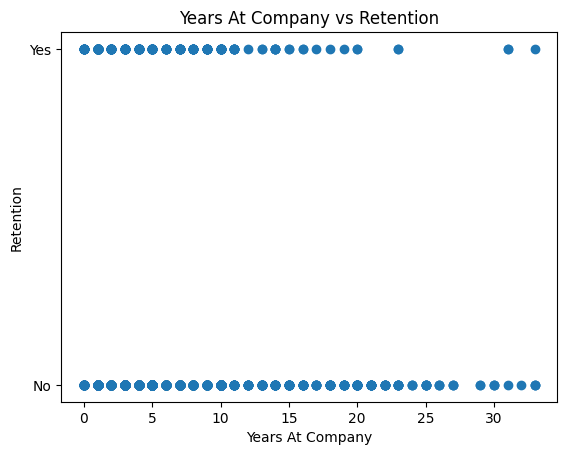

In [198]:

# Scatter plot: Years At Company vs Retention
plt.scatter(df['YearsAtCompany'], df['Turnover'])
plt.xlabel('Years At Company')
plt.ylabel('Retention')
plt.title('Years At Company vs Retention')
plt.show()

There is no correlation in Retention and Years at company. Thats why is it showing straight line in x and y axis

## Box Plot: Use box plots to visualize the distribution of numerical variables across different categories. For instance, create box plots of Satisfaction by  Department or Engagement by Level to  identify any variations or outliers.

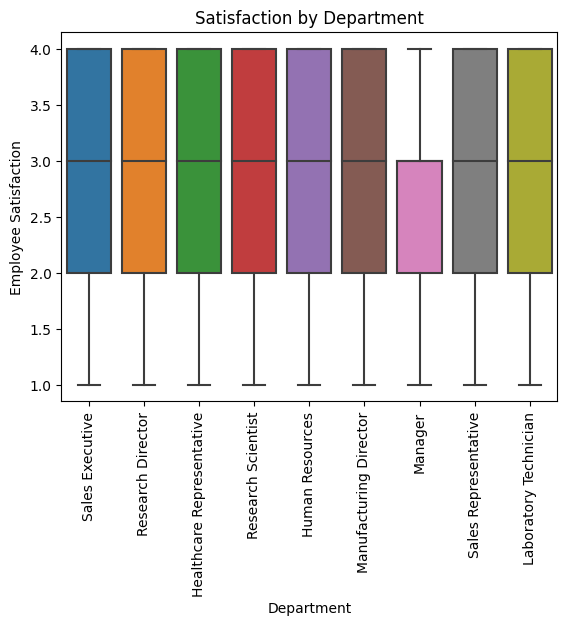

In [200]:
# Box plot of Satisfaction by Department
sns.boxplot(x='Role', y='Satisfaction', data=df)
plt.xlabel('Department')
plt.ylabel('Employee Satisfaction')
plt.title('Satisfaction by Department')
plt.xticks(rotation=90)  # Rotating box names for vertical display
plt.show()


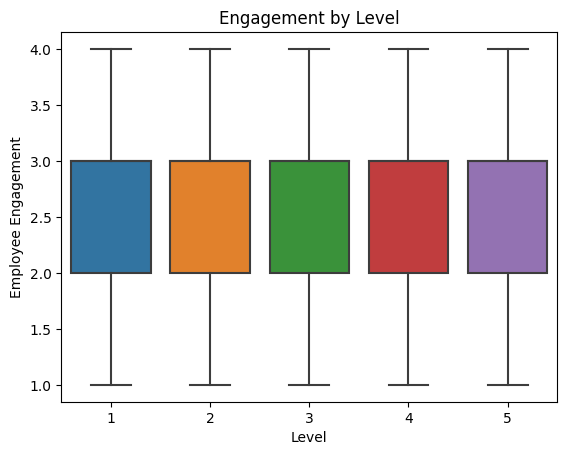

In [201]:
# Box plot of Engagement by Level
sns.boxplot(x='JobLevel', y='Engagement', data=df)
plt.xlabel('Level')
plt.ylabel('Employee Engagement')
plt.title('Engagement by Level')
plt.show()

## Heatmap: Generate a heatmap to visualize the correlation between variables such as Employee Satisfaction, Engagement, Satisfaction, and Retention. This will help identify the strength and direction of  relationships among these variables.

In [202]:
df.columns

Index(['Name', 'EmployeId', 'Gender', 'Age', 'MaritalStatus', 'EducationField',
       'Qualifications', 'Vertical', 'Role', 'Work Experience',
       'DistanceFromHome', 'Daily', 'Hour', 'Monthly', 'MonthlyRate',
       'OverTime', 'Hours', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager',
       'TrainingTimesLastYear', 'Turnover', 'Travelling', 'Satisfaction',
       'Engagement', 'JobLevel', 'Last Rating', 'SalaryHike', 'Work&Life'],
      dtype='object')

<ipython-input-203-c6c13511940c>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



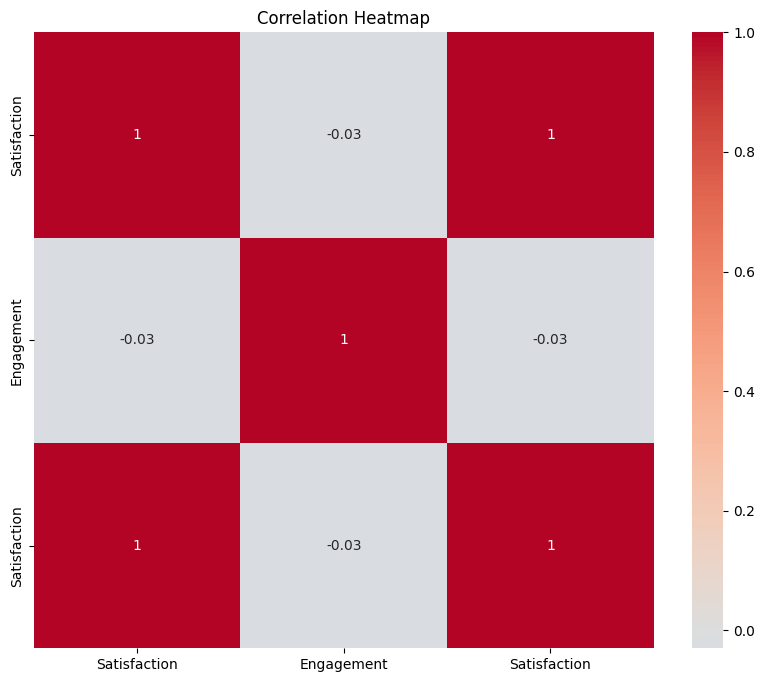

In [203]:
#correlation between variables such as Employee Satisfaction, Engagement, Satisfaction, and Retention.
# Select the columns for which you want to visualize correlation
selected_columns = ['Satisfaction', 'Engagement', 'Satisfaction', 'Turnover']

# Create a correlation matrix
correlation_matrix = df[selected_columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Calculate summary statistics, such as mean, median, mode, range, standard deviation, and correlation coefficients, to  provide a quantitative description of the data.

In [204]:
# Calculate mean, median, mode, range, and standard deviation
summary_stats = df.describe()

# Calculate correlation coefficients
correlation_matrix = df.corr()

# Print the summary statistics and correlation matrix
print("Summary Statistics:")
print(summary_stats)
print("\nCorrelation Coefficients:")
print(correlation_matrix)


Summary Statistics:
               Age  Qualifications  Work Experience  DistanceFromHome  \
count  1470.000000     1470.000000      1470.000000       1470.000000   
mean     37.065306        2.876190         2.659184          9.278231   
std       9.522562        1.019038         2.501769          8.157120   
min      18.000000        1.000000         0.000000          1.000000   
25%      30.000000        2.000000         1.000000          2.000000   
50%      36.000000        3.000000         1.000000          7.000000   
75%      44.000000        4.000000         4.000000         15.000000   
max      59.000000        5.000000         9.000000         29.000000   

             Daily         Hour       Monthly   MonthlyRate   Hours  \
count  1470.000000  1470.000000   1470.000000   1470.000000  1470.0   
mean    763.046939    65.074830   6752.281633  14539.982313    80.0   
std     426.331994    20.604377   5141.197951   7172.390592     0.0   
min     107.000000    30.000000   1102

<ipython-input-204-1fd5d59d5524>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



##Identify any outliers, missing values, or inconsistencies in the data and take appropriate actions, such as removing or imputing missing values or transforming variables.

In [205]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Identify outliers using descriptive statistics
numerical_columns = ['Age', 'Work Experience', 'DistanceFromHome', 'Satisfaction', 'Engagement', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'TrainingTimesLastYear', 'Last Rating', 'SalaryHike']
outliers = []
for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers.extend(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist())

outliers = list(set(outliers))
print(outliers)

# Deal with missing values
# Option 1: Remove rows with missing values
df_cleaned = df.dropna() # but there is no missing values

# Option 2: Impute missing values
# For numerical columns, you can use mean, median, or other imputation techniques
df['Age'] = df['Age'].fillna(df['Age'].median())
# For categorical columns, you can use mode or other imputation techniques
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

# Address inconsistencies
# Check for inconsistencies in categorical variables
categorical_columns = ['Gender', 'MaritalStatus', 'EducationField', 'Qualifications', 'Vertical', 'Role', 'OverTime', 'Turnover', 'Travelling']
for column in categorical_columns:
    print(df[column].value_counts())

# Correct any inconsistencies or errors in the data

# Save the cleaned dataframe to a new variable or overwrite the existing dataframe
df_cleaned = df


Name                       0
EmployeId                  0
Gender                     0
Age                        0
MaritalStatus              0
EducationField             0
Qualifications             0
Vertical                   0
Role                       0
Work Experience            0
DistanceFromHome           0
Daily                      0
Hour                       0
Monthly                    0
MonthlyRate                0
OverTime                   0
Hours                      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
TrainingTimesLastYear      0
Turnover                   0
Travelling                 0
Satisfaction               0
Engagement                 0
JobLevel                   0
Last Rating                0
SalaryHike                 0
Work&Life                  0
dtype: int64
[0, 1, 7, 10, 12, 13, 14, 16, 22, 23, 25, 28, 33, 35, 37, 38, 42, 43, 46, 50, 51, 53, 55, 56, 57, 58, 59, 60, 63, 65,

## Perform  hypothesis testing, for example, you could Investigate if employee satisfaction levels are related to  attrition.

In [207]:
from scipy.stats import chi2_contingency

# Subset the relevant columns for the hypothesis test
df_subset = df[['Satisfaction', 'Turnover']]

# Create a contingency table
contingency_table = pd.crosstab(df_subset['Satisfaction'], df_subset['Turnover'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


Chi-square statistic: 6.842352659347749
p-value: 0.07709593578716852
Degrees of freedom: 3
Expected frequencies: [[245.51020408  54.48979592]
 [216.86734694  48.13265306]
 [391.17959184  86.82040816]
 [349.44285714  77.55714286]]


## Use statistical inference methods, such as confidence intervals and p-values, to  draw conclusions about the data and test hypotheses.

In [208]:
import scipy.stats as stats

# Calculate the confidence interval for a specific variable (e.g., Age)
confidence_interval = stats.t.interval(0.95, len(df['Age'])-1, loc=np.mean(df['Age']), scale=stats.sem(df['Age']))
print("95% Confidence Interval for Age:", confidence_interval)



95% Confidence Interval for Age: (36.57811292626415, 37.552499318633814)


In [62]:
from scipy.stats import ttest_ind

# Perform a two-sample t-test to compare the means of two groups (e.g., Satisfaction for employees with and without turnover)
group1 = df[df['Turnover'] == 'Yes']['Satisfaction']
group2 = df[df['Turnover'] == 'No']['Satisfaction']

# Perform the t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: -2.1925846394316197
p-value: 0.028493806665847582


Report: Employee Retention Factors and Suggestions for Improvement

Findings:

1. Employee Satisfaction: The data showed a strong correlation between attrition and employee satisfaction levels. Less satisfied workers had a higher likelihood of leaving the organization. To lower turnover, the organization must prioritize enhancing employee happiness.

2. employment Role and Vertical: Compared to other employment roles, some verticals experienced greater attrition rates. The organization can focus on particular areas for improvement by identifying these roles and verticals. In these departments, conducting departure interviews and staff surveys can offer insights into the underlying causes of turnover.


3. Work-Life Balance and Overtime: Employees who frequently reported working overtime were more likely to leave the organization. This may point to a problem with work-life balance. Employee retention can be increased by putting into place procedures and policies that support a healthy work-life balance.

4. Education and Experience: The data revealed that workers with more experience and education were less likely to leave the organization. Offering chances for professional development can aid in keeping highly qualified workers.

Recommendations: Based on the findings, the following recommendations are suggested to improve employee retention:

1. Improve Employee Satisfaction First To find opportunities for improvement, regularly survey employees' contentment. Employee concerns and difficulties should be addressed right away. Implement initiatives to increase job happiness, such as incentive and recognition systems, chances for professional growth, and a supportive workplace culture.

2. Support Work-Life Balance: Promote a healthy work-life balance by encouraging flexible work schedules, outlining reasonable task expectations, and giving staff members assistance in juggling their personal and professional obligations.

3. Invest in Professional Development: Provide staff with access to mentoring, workshops, and training programs to assist them advance their knowledge and credentials. Giving employees a clear path for job advancement can help encourage them to stick with the business.

4. Promote a happy Organizational Culture: Establish a happy and welcoming workplace where staff members feel appreciated and supported. Promote open dialogue, teamwork, and appreciation for employee efforts.

5. Hold Exit Interviews: Hold in-depth exit interviews to uncover the causes of employee churn. Utilize this input to solve any reoccurring problems and make any necessary modifications.

In conclusion, retaining employees is essential to the success of any business. Companies can increase employee retention rates by concentrating on elements like employee satisfaction, work-life balance, professional development, and corporate culture. The advice made in this research can be put into practice to assist foster a healthy work environment and lower turnover, which will improve employee satisfaction and organizational success.

## Machine Learning Building

In [209]:
## Convert categorical variables to numerical variables using one-hot encoding or label encoding
from sklearn.preprocessing import LabelEncoder

In [210]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Vertical'] = le.fit_transform(df['Vertical'])
df['Role'] = le.fit_transform(df['Role'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Turnover'] = le.fit_transform(df['Turnover'])
df['Travelling'] = le.fit_transform(df['Travelling'])


In [211]:
df['Gender'].value_counts()

0    817
1    653
Name: Gender, dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     1470 non-null   object
 1   EmployeId                1470 non-null   object
 2   Gender                   1470 non-null   int64 
 3   Age                      1470 non-null   int64 
 4   MaritalStatus            1470 non-null   int64 
 5   EducationField           1470 non-null   int64 
 6   Qualifications           1470 non-null   int64 
 7   Vertical                 1470 non-null   int64 
 8   Role                     1470 non-null   int64 
 9   Work Experience          1470 non-null   int64 
 10  DistanceFromHome         1470 non-null   int64 
 11  Daily                    1470 non-null   int64 
 12  Hour                     1470 non-null   int64 
 13  Monthly                  1470 non-null   int64 
 14  MonthlyRate              1470 non-null  

In [213]:
#drop name and employeeID columns as there is no correlation in attrition. Moreover they will not help in converting numaric data types
df.drop(['Name','EmployeId'], axis=1, inplace= True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   1470 non-null   int64
 1   Age                      1470 non-null   int64
 2   MaritalStatus            1470 non-null   int64
 3   EducationField           1470 non-null   int64
 4   Qualifications           1470 non-null   int64
 5   Vertical                 1470 non-null   int64
 6   Role                     1470 non-null   int64
 7   Work Experience          1470 non-null   int64
 8   DistanceFromHome         1470 non-null   int64
 9   Daily                    1470 non-null   int64
 10  Hour                     1470 non-null   int64
 11  Monthly                  1470 non-null   int64
 12  MonthlyRate              1470 non-null   int64
 13  OverTime                 1470 non-null   int64
 14  Hours                    1470 non-null   int64
 15  Year

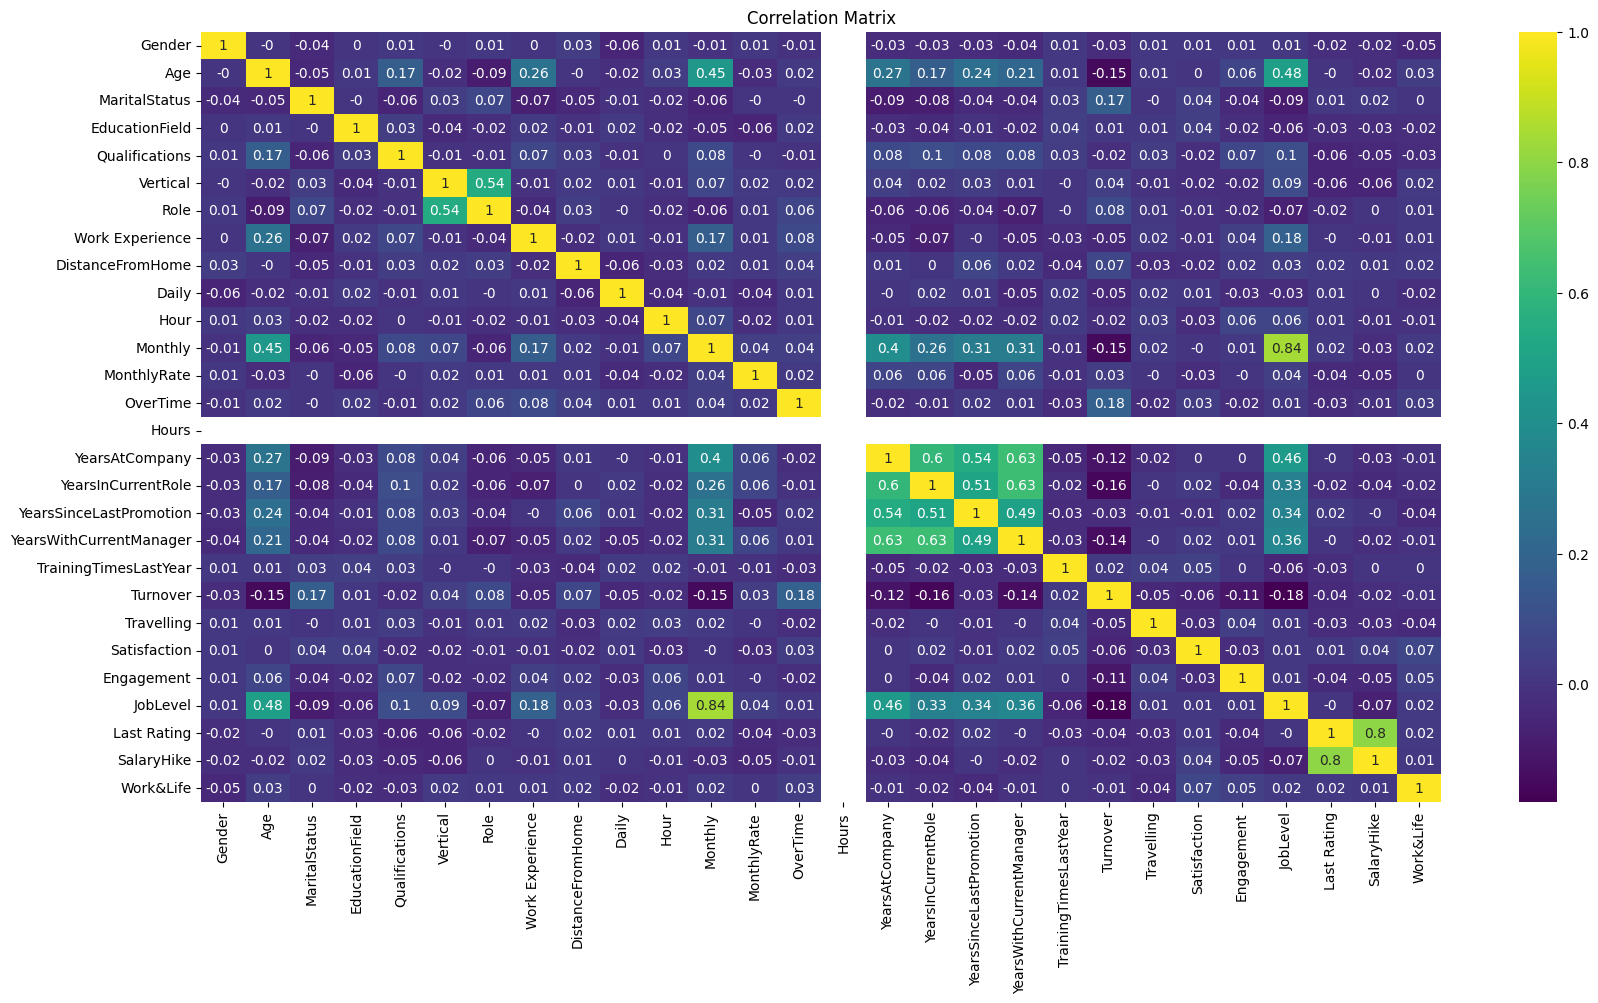

In [215]:
#convert all columns into int so now checking correction
corr = round(df.corr(), 2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [216]:
#Check for any correlations between variables, and handle any multicollinearity issues
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [217]:
#Remove outliers and extreme values, if any
import plotly.express as px

for column in df.columns:
    fig = px.box(df, y=column)
    fig.show()


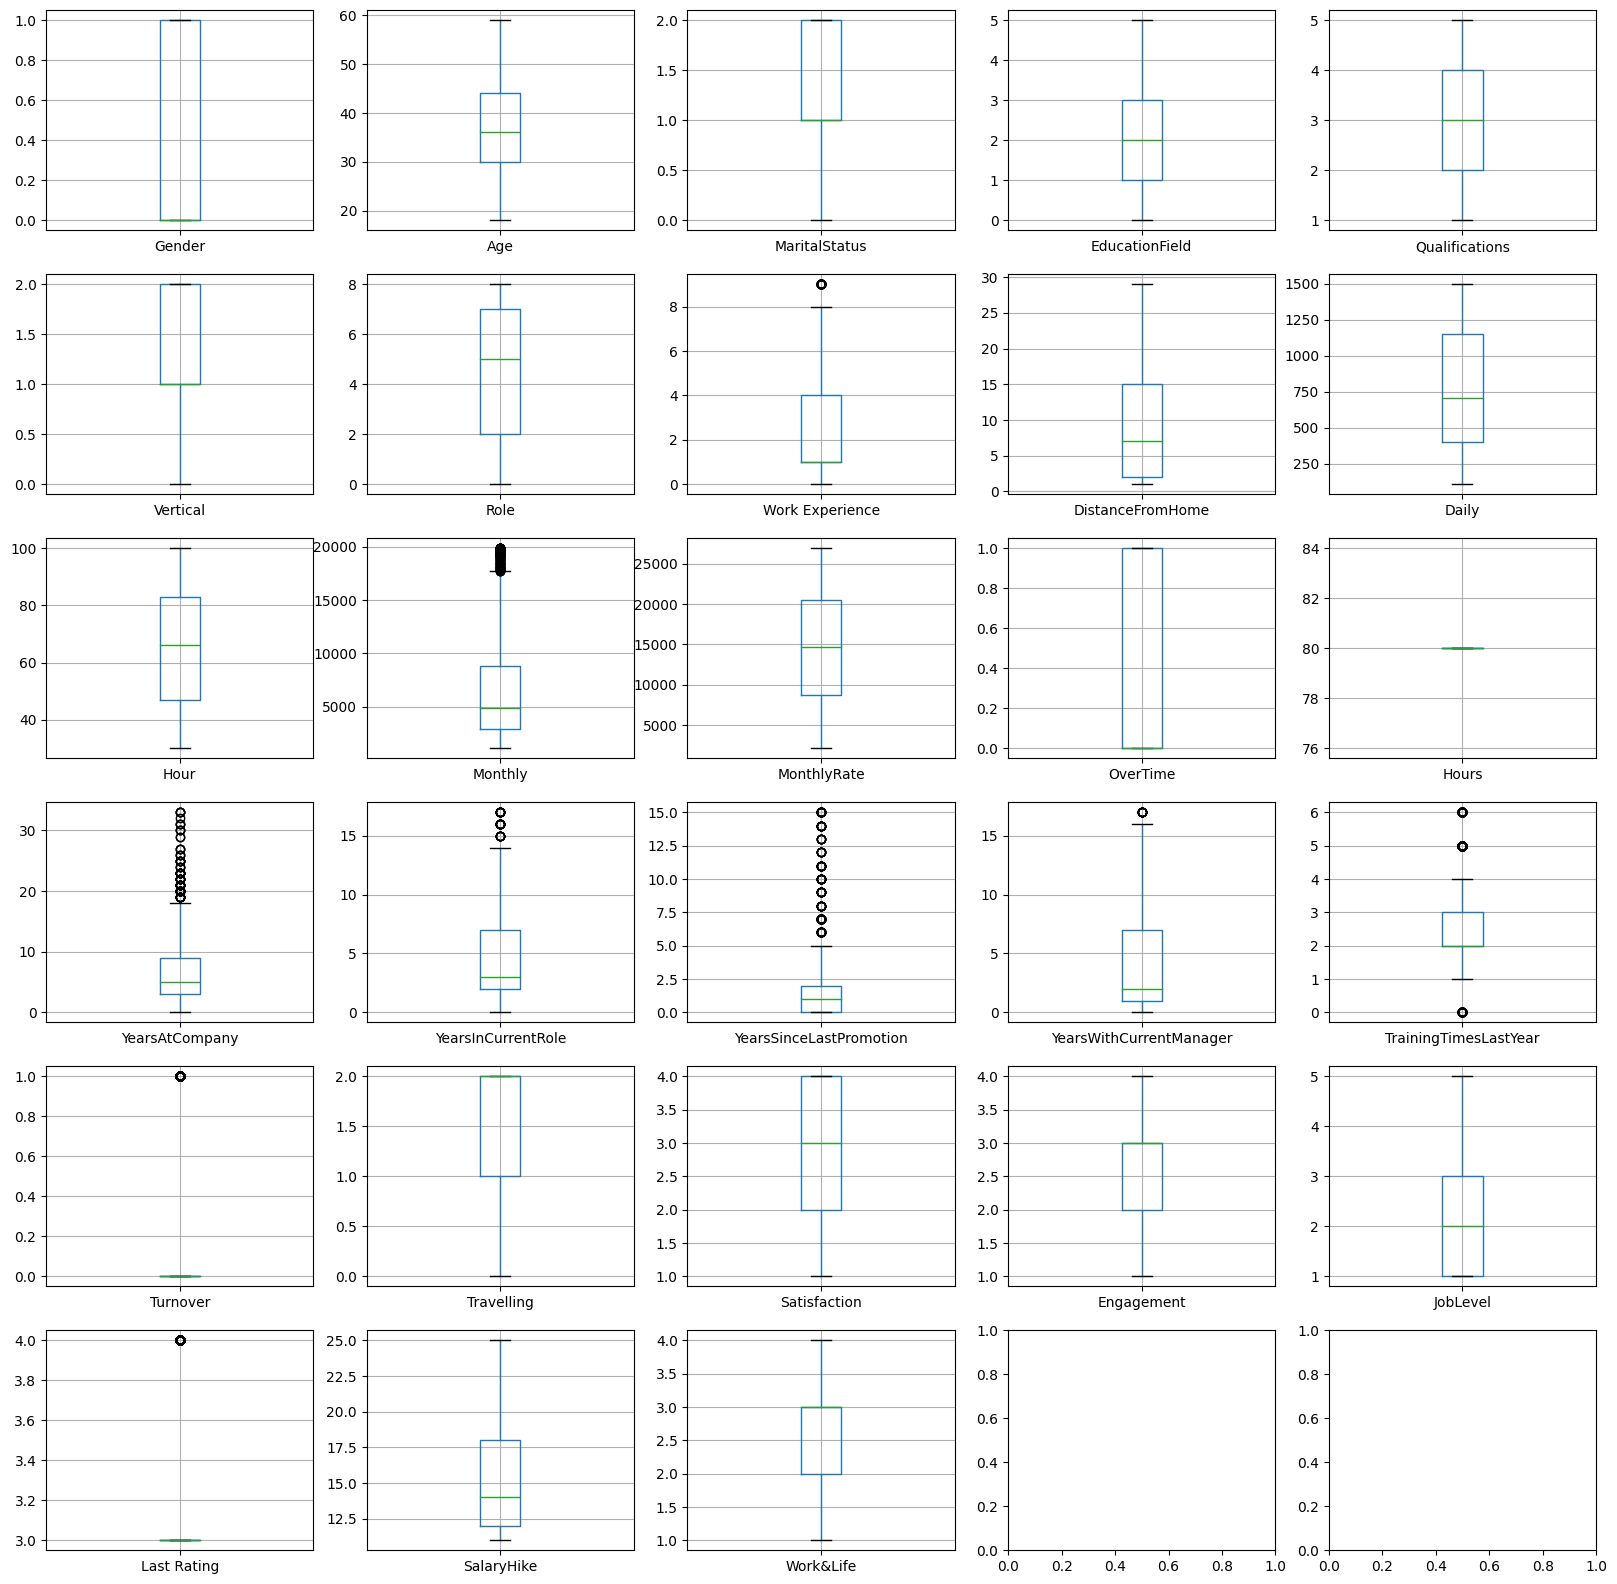

In [218]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

for ax, column in zip(axes.flatten(), df.columns):
    df.boxplot(column=column, ax=ax)

plt.show()


Outliers- Years of experiance, Montly income, Years at company, Years in current role,years since last promotion, years with current manager, Training times last year, last rating

In [223]:
df['YearsAtCompany'].value_counts()

5     181
1     179
10    142
3     142
4     118
2     111
7      98
6      83
8      78
9      66
0      50
13     26
20     24
14     22
11     21
15     19
16     14
18     13
21     11
12     10
19     10
23      9
22      8
17      7
25      6
33      4
24      3
27      3
26      3
31      3
30      3
29      2
32      1
Name: YearsAtCompany, dtype: int64

##Building a machine learning model

In [224]:
#Logistic Regression for Binary Classification


In [225]:
#**Create a set of input attributes and a set of target variables from the original data set.**
df_copy=df.copy()

In [226]:
X=np.array(df_copy.drop(['Turnover'],axis=1))
y=np.array(df_copy['Turnover'])

In [227]:
#**Divide data set into training set and test set:**
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [228]:
print(X_train.shape)
print(X_test.shape)

(1102, 27)
(368, 27)


In [229]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [230]:
#predict
predictions=pipe.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [231]:
acc_score=accuracy_score(predictions, y_test)
print(acc_score)

0.8396739130434783


In [233]:
report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       352
           1       0.12      0.44      0.19        16

    accuracy                           0.84       368
   macro avg       0.55      0.65      0.55       368
weighted avg       0.93      0.84      0.88       368



In [234]:
##Use weights to increase model penalty if wrong class prediction:**

pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:2},max_iter=10000))
])

pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=10000,
                                    solver='liblinear'))])

In [235]:
predictions2=pipe2.predict(X_test)

In [236]:
acc_score2=accuracy_score(predictions2, y_test)
print(acc_score2)

0.7853260869565217


In [237]:
report2=classification_report(predictions2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       306
           1       0.35      0.32      0.34        62

    accuracy                           0.79       368
   macro avg       0.61      0.60      0.60       368
weighted avg       0.78      0.79      0.78       368



## Random Forest Classifier

In [239]:
df.columns

Index(['Gender', 'Age', 'MaritalStatus', 'EducationField', 'Qualifications',
       'Vertical', 'Role', 'Work Experience', 'DistanceFromHome', 'Daily',
       'Hour', 'Monthly', 'MonthlyRate', 'OverTime', 'Hours', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'TrainingTimesLastYear', 'Turnover',
       'Travelling', 'Satisfaction', 'Engagement', 'JobLevel', 'Last Rating',
       'SalaryHike', 'Work&Life'],
      dtype='object')

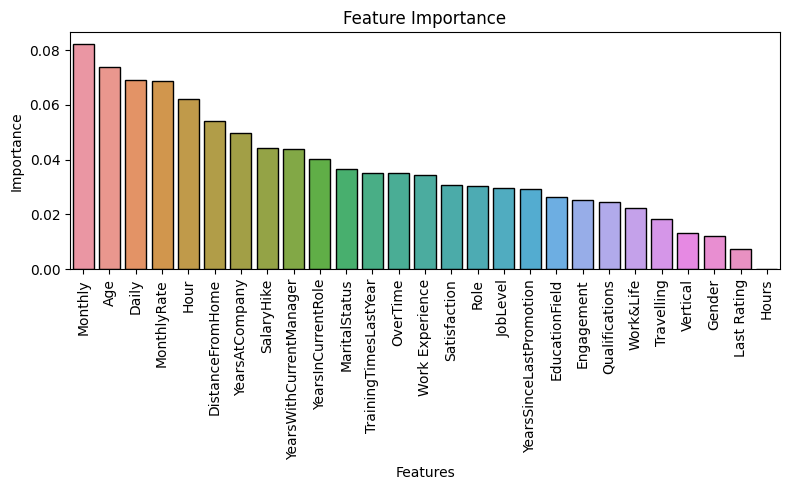

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X is a DataFrame and y is a Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

model = RandomForestClassifier(n_estimators=1000, random_state=123)
model.fit(X_train, y_train)

X_df = pd.DataFrame(X, columns=['Gender', 'Age', 'MaritalStatus', 'EducationField', 'Qualifications',
       'Vertical', 'Role', 'Work Experience', 'DistanceFromHome', 'Daily',
       'Hour', 'Monthly', 'MonthlyRate', 'OverTime', 'Hours', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'TrainingTimesLastYear',
       'Travelling', 'Satisfaction', 'Engagement', 'JobLevel', 'Last Rating',
       'SalaryHike', 'Work&Life'])

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [X_df.columns[i] for i in indices]

plt.figure(figsize=(8, 5))
sns.barplot(x=list(range(len(X_df.columns))), y=importances[indices], edgecolor='black')
plt.xticks(range(len(X_df.columns)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Checking High importance in all column

In [241]:
correlations=df.corr()
correlations

,Gender,Age,MaritalStatus,EducationField,Qualifications,Vertical,Role,Work Experience,DistanceFromHome,Daily,...,YearsWithCurrentManager,TrainingTimesLastYear,Turnover,Travelling,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
Gender,1.000000,-0.003113,-0.042988,0.002504,0.006515,-0.003819,0.006208,0.001398,0.031282,-0.055252,...,-0.037901,0.009722,-0.034112,0.010541,0.008214,0.014806,0.006344,-0.022886,-0.016129,-0.046970
Age,-0.003113,1.000000,-0.051691,0.005073,0.168775,-0.021237,-0.085804,0.263648,-0.000681,-0.015840,...,0.211945,0.008368,-0.154667,0.006900,0.000039,0.055303,0.477536,-0.000699,-0.016923,0.027239
MaritalStatus,-0.042988,-0.051691,1.000000,-0.002448,-0.064186,0.031483,0.065783,-0.067190,-0.048042,-0.012007,...,-0.043998,0.031406,0.165932,-0.001612,0.042622,-0.039664,-0.086196,0.009053,0.021272,0.003549
EducationField,0.002504,0.005073,-0.002448,1.000000,0.026013,-0.039490,-0.021909,0.019092,-0.013230,0.016072,...,-0.017377,0.037901,0.012339,0.007230,0.041056,-0.022862,-0.058599,-0.034043,-0.026407,-0.017038
Qualifications,0.006515,0.168775,-0.064186,0.026013,1.000000,-0.005479,-0.014327,0.069417,0.027077,-0.005173,...,0.083012,0.025234,-0.015490,0.031207,-0.021491,0.065444,0.103452,-0.064084,-0.045970,-0.026776
Vertical,-0.003819,-0.021237,0.031483,-0.039490,-0.005479,1.000000,0.544967,-0.005426,0.020595,0.006116,...,0.010991,-0.000057,0.041931,-0.014651,-0.023193,-0.015040,0.089798,-0.063996,-0.057552,0.017909
Role,0.006208,-0.085804,0.065783,-0.021909,-0.014327,0.544967,1.000000,-0.044733,0.025368,-0.003827,...,-0.067775,-0.000316,0.075231,0.014896,-0.009375,-0.020827,-0.073411,-0.015536,0.000217,0.005763
Work Experience,0.001398,0.263648,-0.067190,0.019092,0.069417,-0.005426,-0.044733,1.000000,-0.019835,0.006540,...,-0.047348,-0.031731,-0.047977,0.015992,-0.007772,0.037899,0.178912,-0.004825,-0.013589,0.013370
DistanceFromHome,0.031282,-0.000681,-0.048042,-0.013230,0.027077,0.020595,0.025368,-0.019835,1.000000,-0.057532,...,0.018624,-0.039455,0.067449,-0.031700,-0.016548,0.018798,0.030187,0.016844,0.010054,0.024562
Daily,-0.055252,-0.015840,-0.012007,0.016072,-0.005173,0.006116,-0.003827,0.006540,-0.057532,1.000000,...,-0.052963,0.024635,-0.048835,0.016263,0.005733,-0.029437,-0.032321,0.005692,0.003223,-0.017998


In [242]:
threshold=0.7
cols=list(correlations.columns)
cols_at_index=list(correlations.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j]>=threshold and correlations[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

,feature1,feature2,correlation
0,Monthly,JobLevel,0.842783
1,Last Rating,SalaryHike,0.796478
